In [12]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from rampds.fe_utils.utils import FileUtils

### TODO

- Also plot time per experiment (might be biased for the first one as caching might have been used for training)
- Maybe do something to make plots easier (e.g add a start on the best n selected features, add bigger text for objective direction ...)

In [7]:
datasets = [
    "concrete_strength",
    "rainfall", 
    "wine_quality",
    "employee_attrition",
    "blueberry_yield",
    "heat_flux",
    "abalone",
    "mohs_hardness", 
    "crab_age",
    "housing_price_california",
    "influencer",
    "cirrhosis_outcomes",
    "sticker_sales",
    "reservation_cancellation",
    "obesity_risk",
    "loan_approval",
    "calorie_expenditure",
    "credit_fusion",
    "bank_churn",
    "failure",
    "unknown_a",
    "horse_survival", 
    "media_cost",
    "smoking",
    "mercedes_testing_time",
    "insurance_claim",
    "synthanic",
    "mental_health",
    "flood_probability",
    "insurance_premium",
    "covertype",
    "loan_loss",
]

In [21]:
def get_both_plots(data_name):
    plots_file = "openfe_scores_plot.png"
    kaggle_name = f"kaggle_{data_name}"
    base_path = pathlib.Path("openfe_experiments")
    path1 = base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search"
    path2 = base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search_blend"
    path3 = base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search_blend_4_models"
    plot1 = path1 / kaggle_name / plots_file
    plot2 = path2 / kaggle_name / plots_file
    plot3 = path3 / kaggle_name / plots_file
    return str(plot1), str(plot2), str(plot3)

# def get_metadata_paths(data_name)
def get_both_metadata(data_name):
    metadata_file = "experiment_metadata.json"
    kaggle_name = f"kaggle_{data_name}"
    base_path = pathlib.Path("openfe_experiments")
    path1 = base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search"
    path2 = base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search_blend"
    path3 = base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search_blend_4_models"
    metadata_path1 = path1 / kaggle_name / metadata_file
    metadata_path2 = path2 / kaggle_name / metadata_file
    metadata_path3 = path3 / kaggle_name / metadata_file
    metadata_1 = FileUtils.load_json(metadata_path1)
    metadata_2 = FileUtils.load_json(metadata_path2)
    metadata_3 = FileUtils.load_json(metadata_path3)
    return metadata_1, metadata_2, metadata_3

In [40]:
def compare_plots(data_name, single_lgbm_plot, bugged_plot, lgbm_plot, figsize=(16, 10), fontsize=9):
    """
    Display two plots side by side for comparison.
    
    Args:
        data_name: Name of the dataset
        figsize: Figure size as (width, height)
    """

     # Load and display the images
    try:
        img1 = mpimg.imread(single_lgbm_plot)
        img2 = mpimg.imread(bugged_plot)
        img3 = mpimg.imread(lgbm_plot)
    except FileNotFoundError as e:
        print(f"Error loading images: {e}")
        return
    
    # Create figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)

    ax1.imshow(img1)
    ax1.set_title(f'{data_name} - Single LGBM', fontsize=fontsize)
    ax1.axis('off')
    
    ax2.imshow(img2)
    ax2.set_title(f'{data_name} - Bugged Blend (Actually single lgbm)', fontsize=fontsize)
    ax2.axis('off')

    ax3.imshow(img3)
    ax3.set_title(f'{data_name} - LGBM Blend (4 Models)', fontsize=fontsize)
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()


def compare_execution_times(data_name, single_metadata, bugged_metadata, blend_metadata, figsize=(16, 6)):
    # times in minutes
    single_time = single_metadata["total_time_seconds"] / 60
    bugged_time = bugged_metadata["total_time_seconds"] / 60
    blend_time = blend_metadata["total_time_seconds"] / 60

    times = [single_time, bugged_time, blend_time]
    labels = ['Single LGBM (training caching)', 'Bugged Blend (2 models - 1 caching)', 'LGBM Blend (4 models - no cache)']

    fig, ax = plt.subplots(figsize=figsize)

    x = range(len(times))
    colors = ['#4C72B0', '#DD8452', '#55A868']
    bars = ax.bar(x, times, color=colors, edgecolor='black')

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=25, ha='right')
    ax.set_ylabel('Time (minutes)')
    ax.set_title(f'Execution time comparison — {data_name}')
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    # annotate bars with minutes
    for bar, t in zip(bars, times):
        height = bar.get_height()
        ax.annotate(f'{t:.1f} min',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
    return fig, ax



Comparing plots for dataset: concrete_strength

Objective Direction: minimize



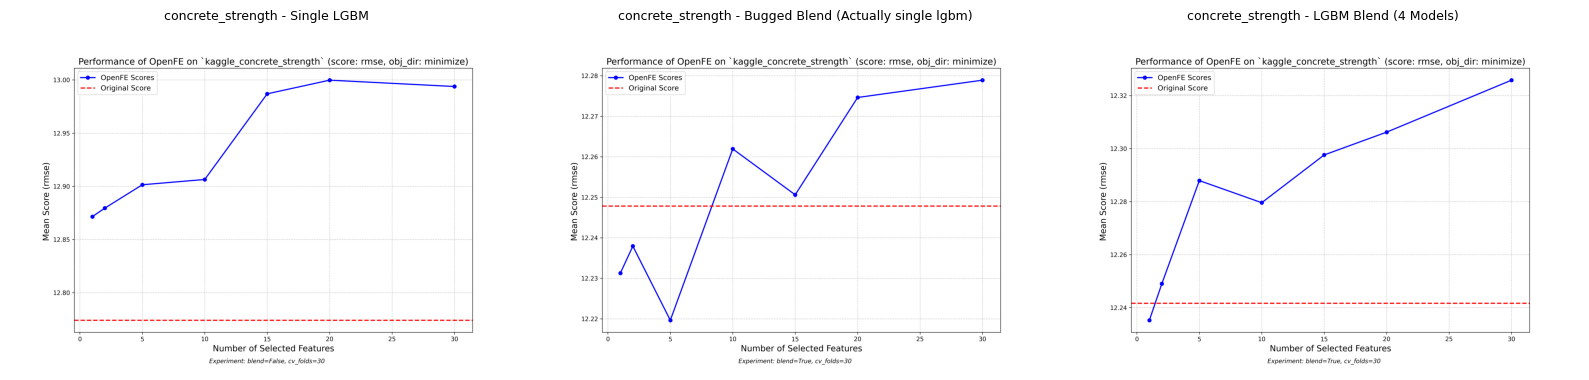

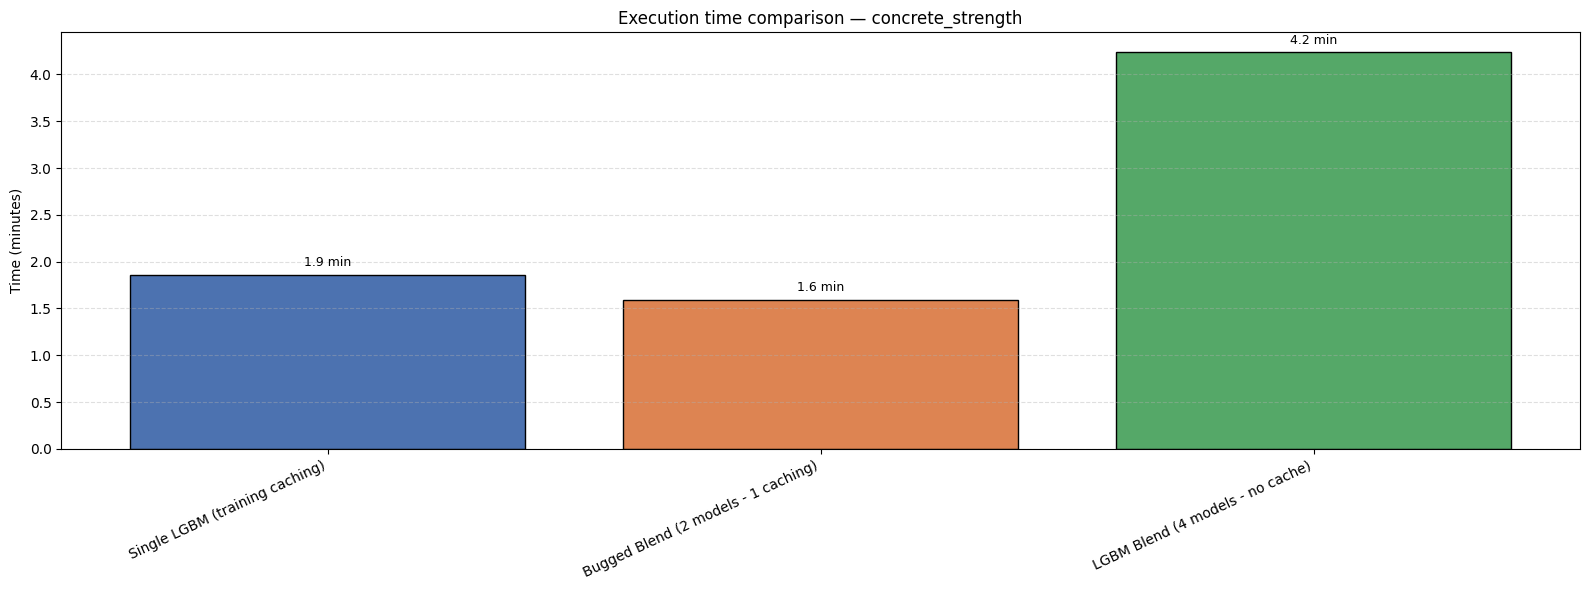



Comparing plots for dataset: rainfall

Objective Direction: maximize



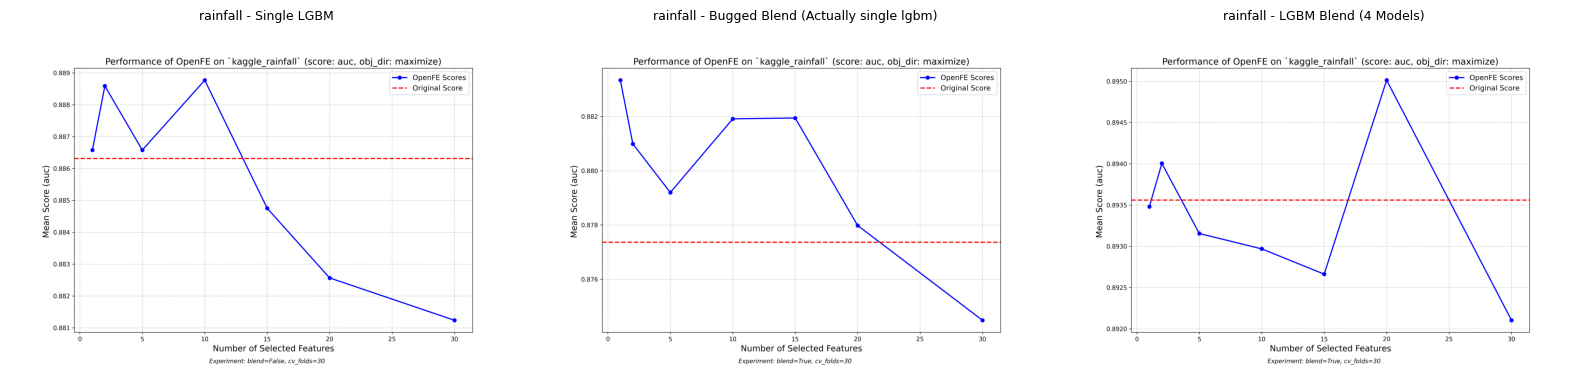

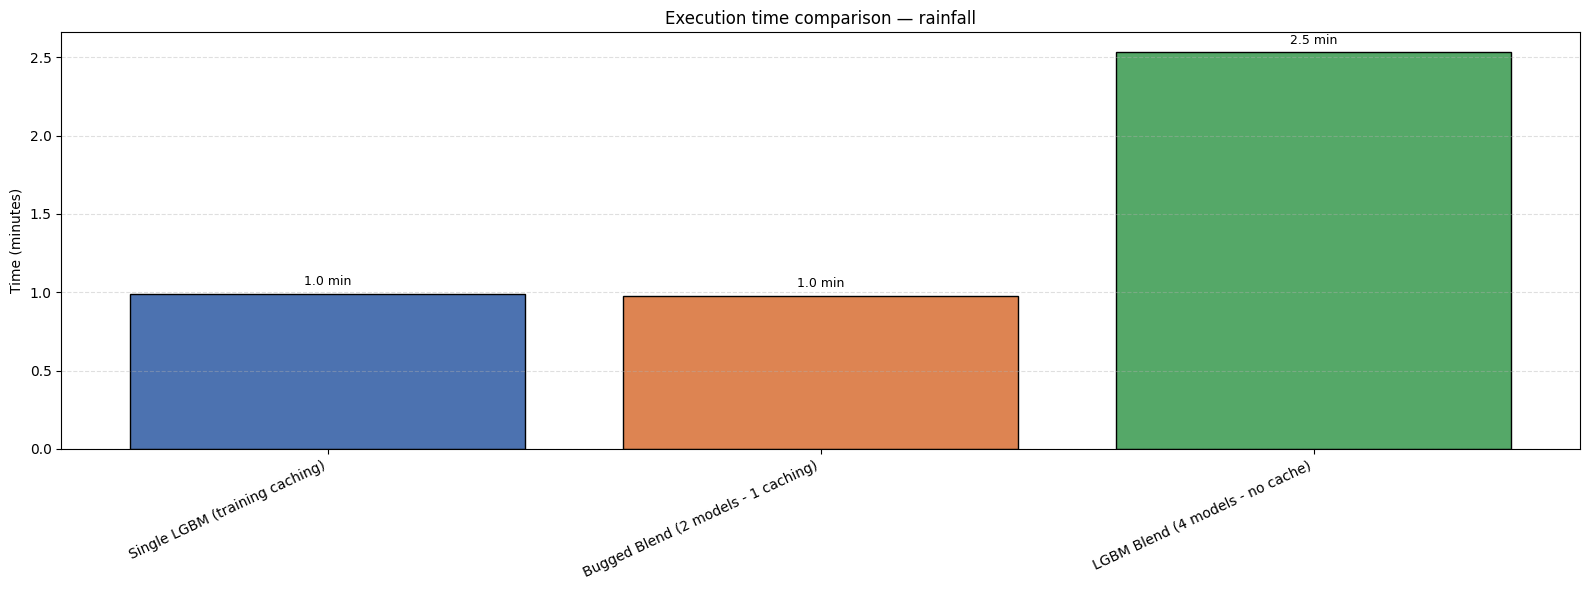



Comparing plots for dataset: wine_quality

Objective Direction: maximize



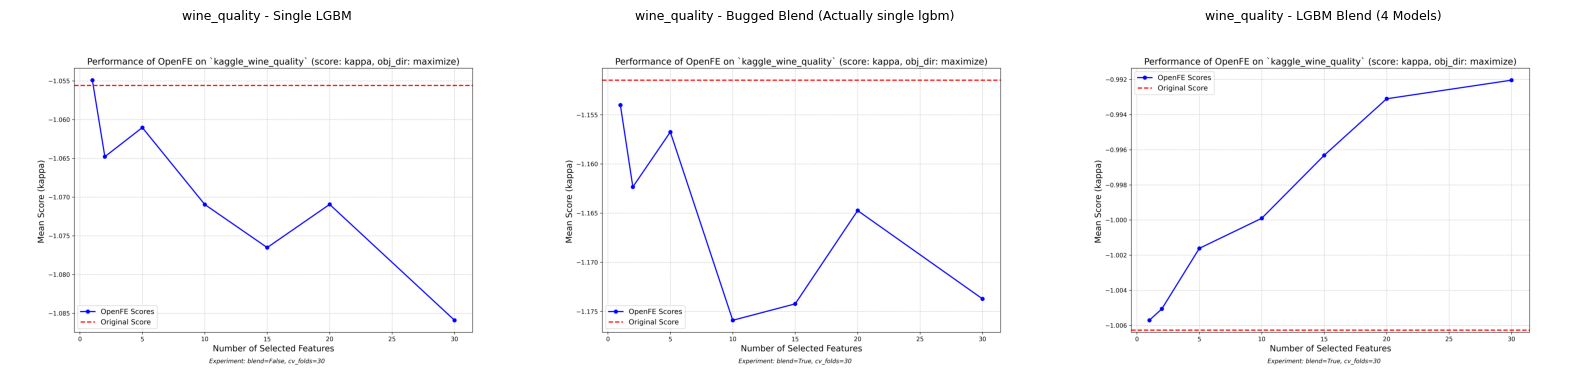

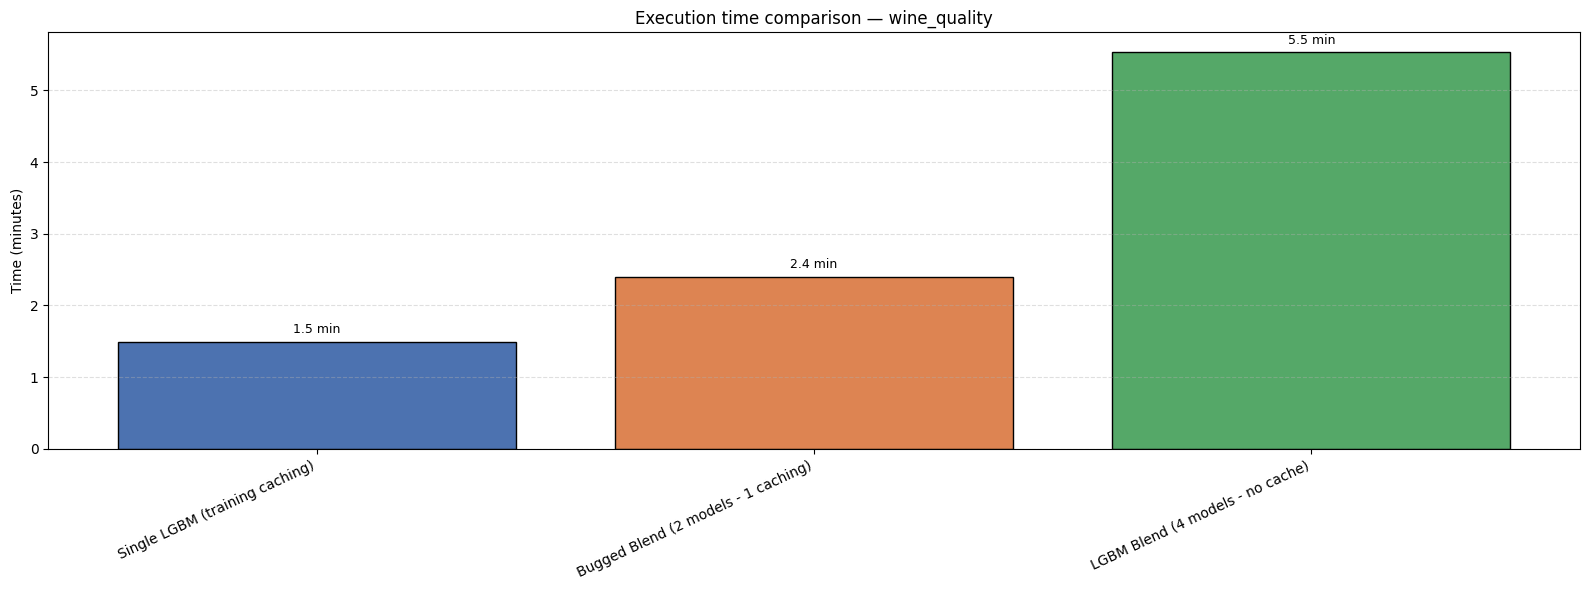



Comparing plots for dataset: employee_attrition

Objective Direction: maximize



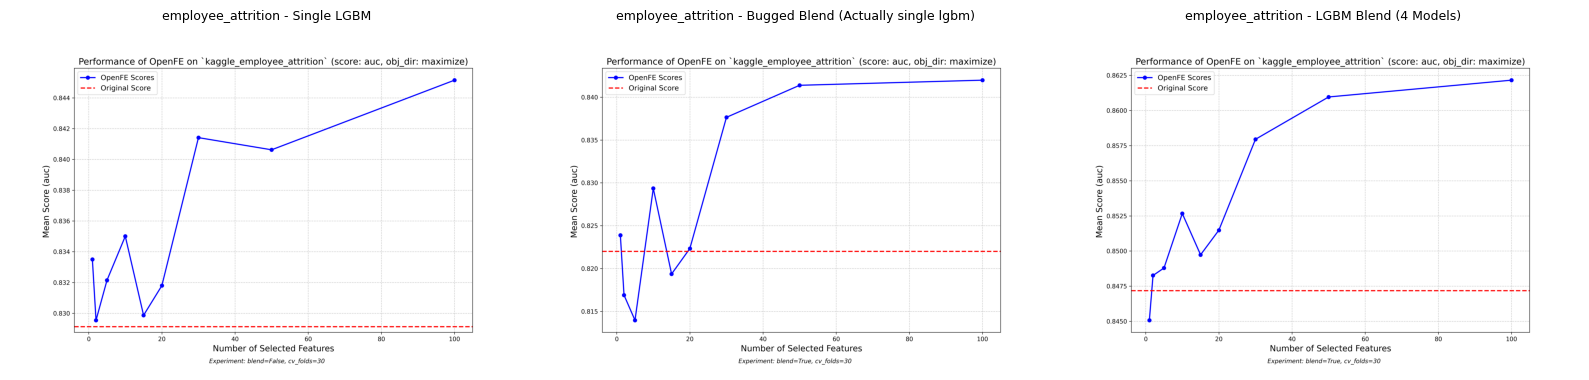

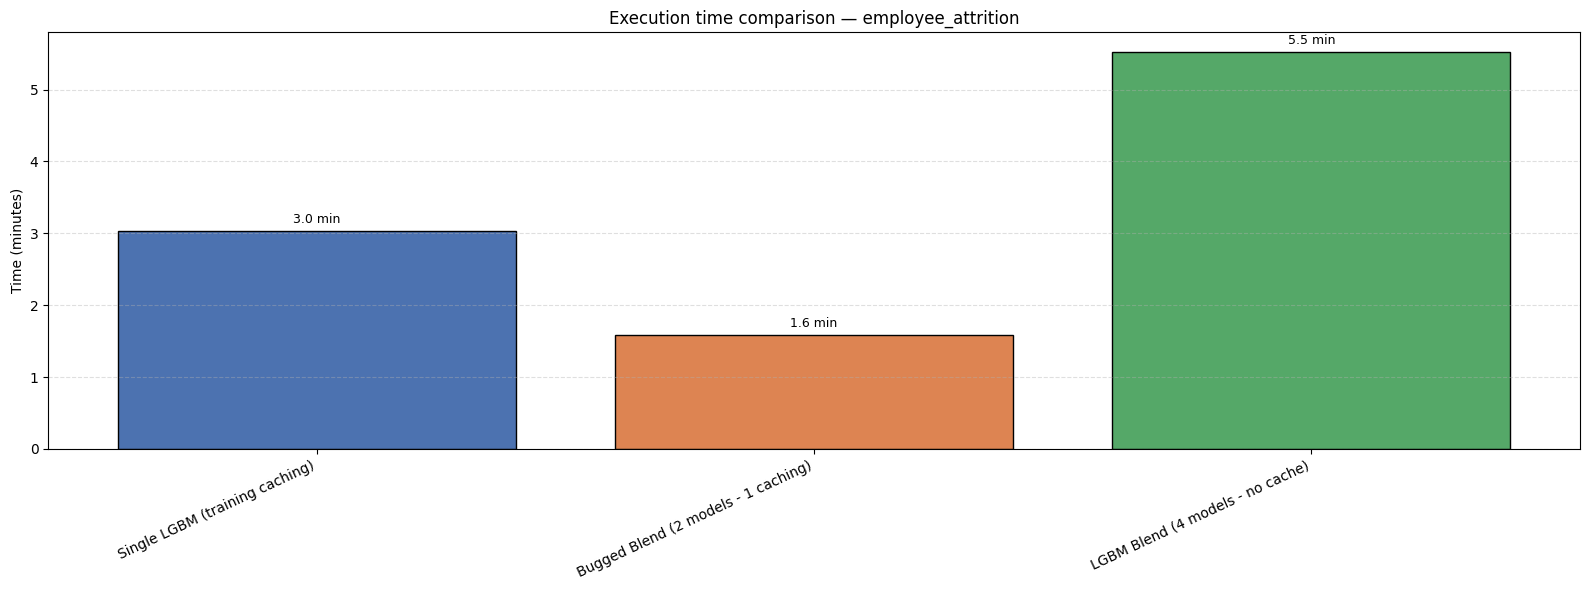



Comparing plots for dataset: blueberry_yield

Objective Direction: minimize



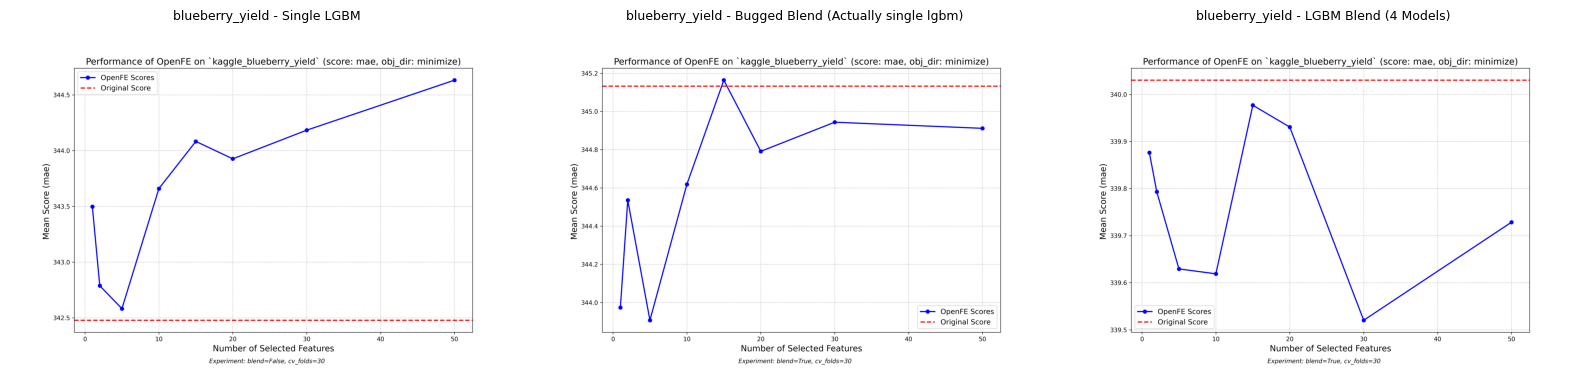

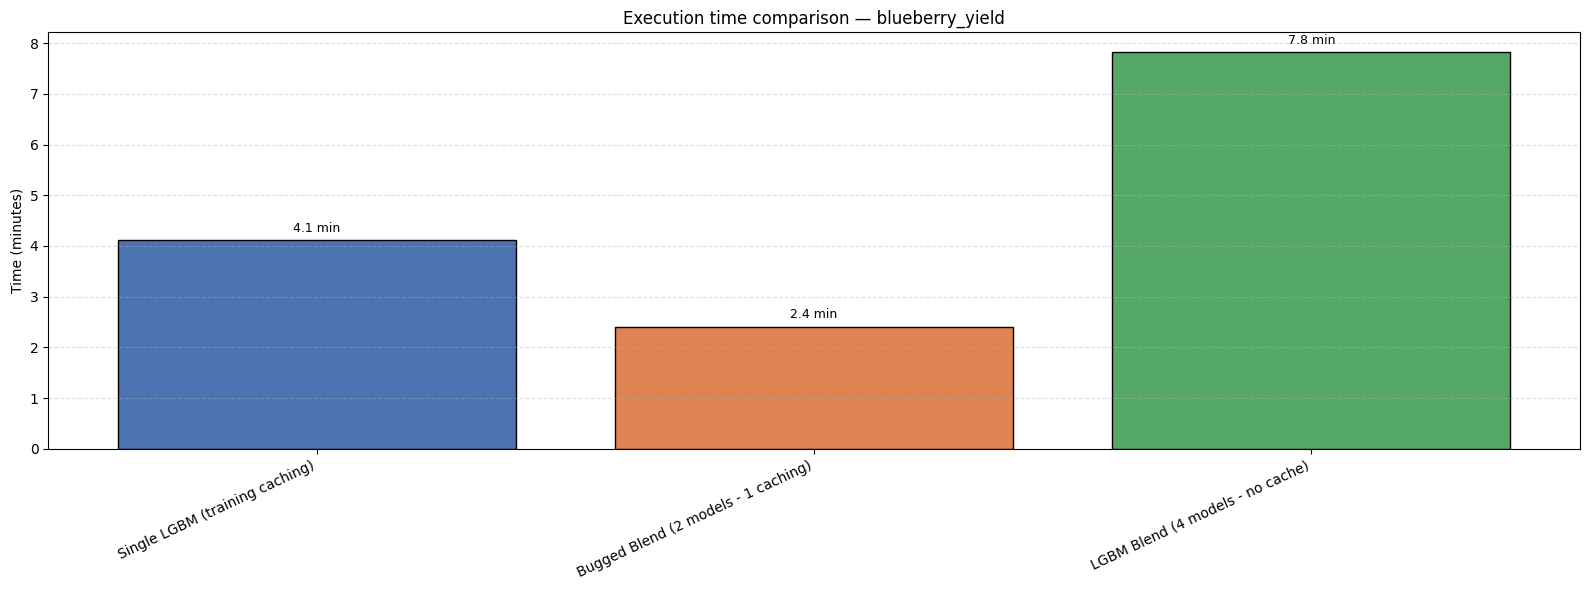



Comparing plots for dataset: heat_flux

Objective Direction: minimize



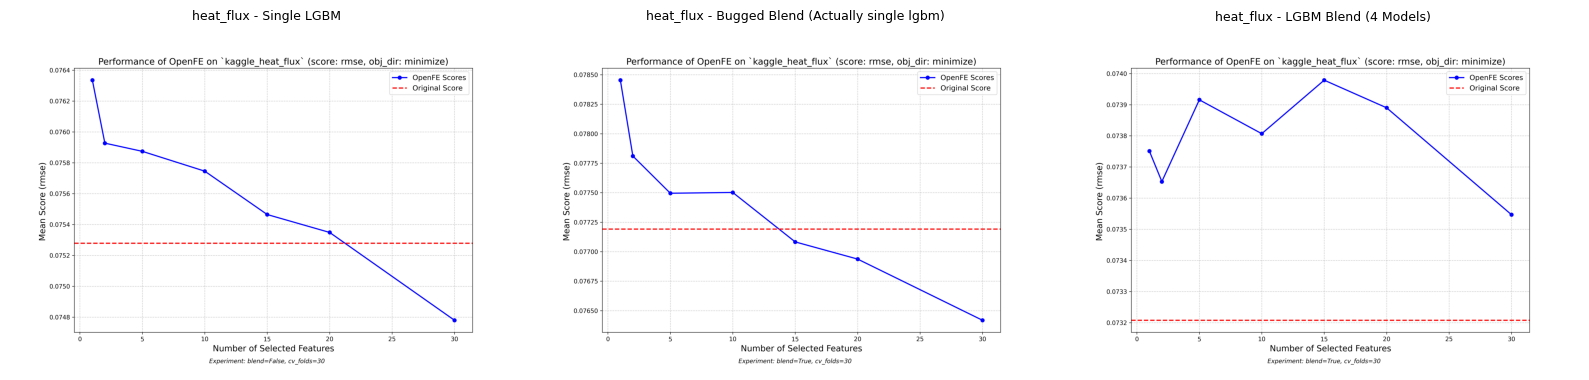

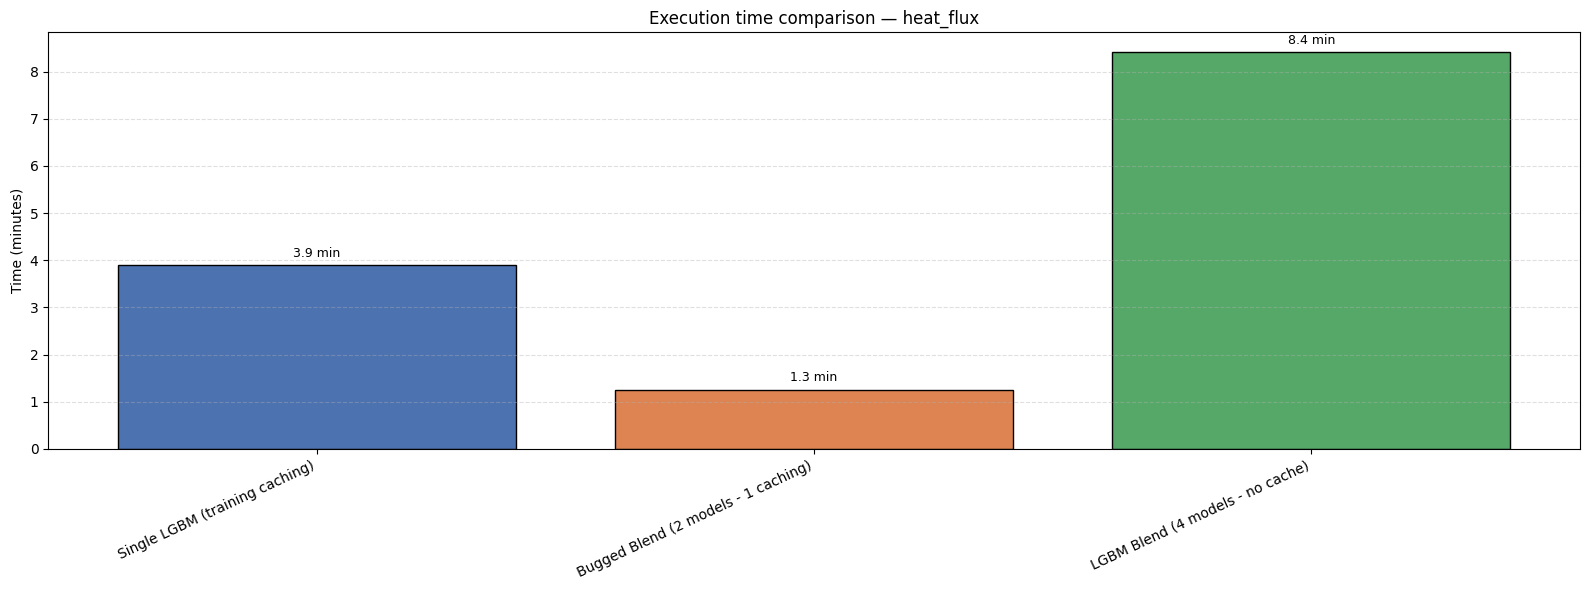



Comparing plots for dataset: abalone

Objective Direction: minimize



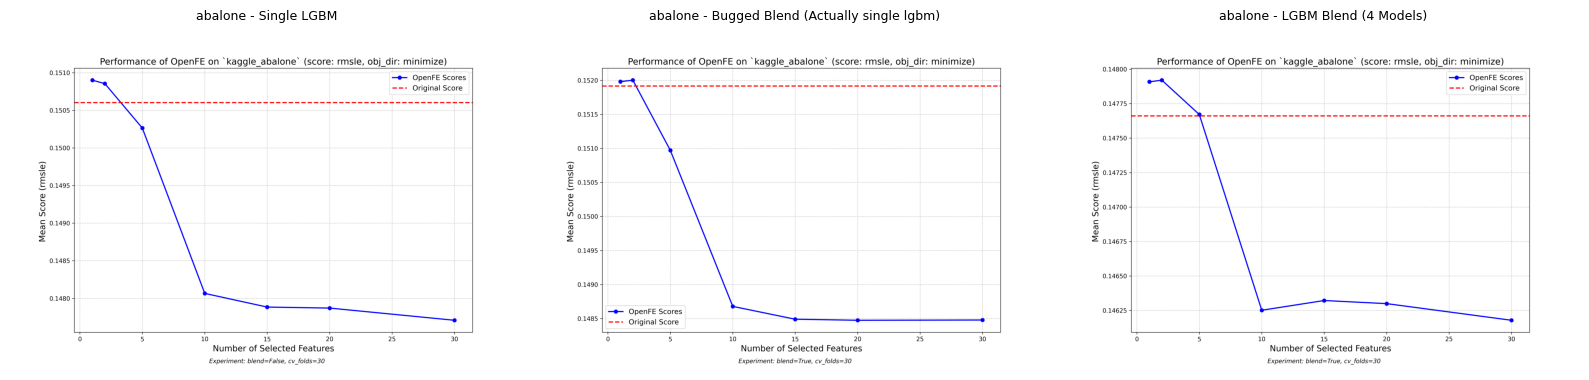

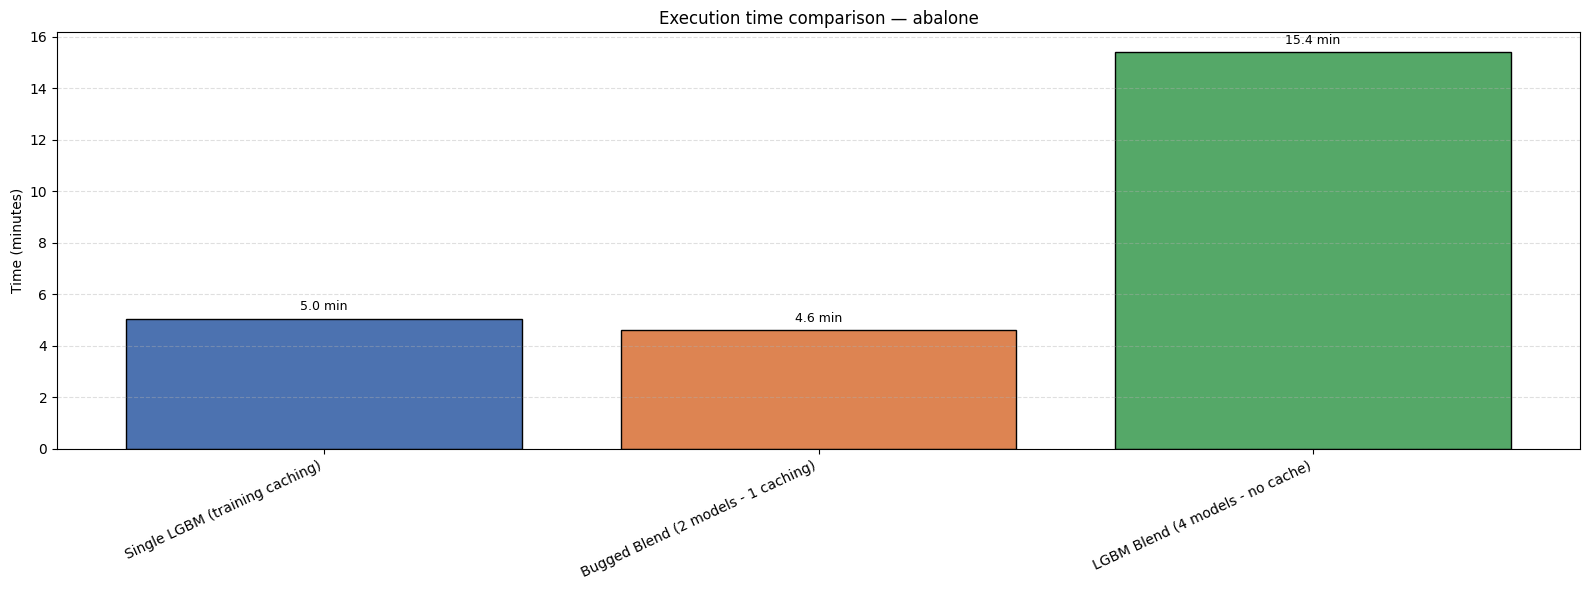



Comparing plots for dataset: mohs_hardness

Objective Direction: minimize



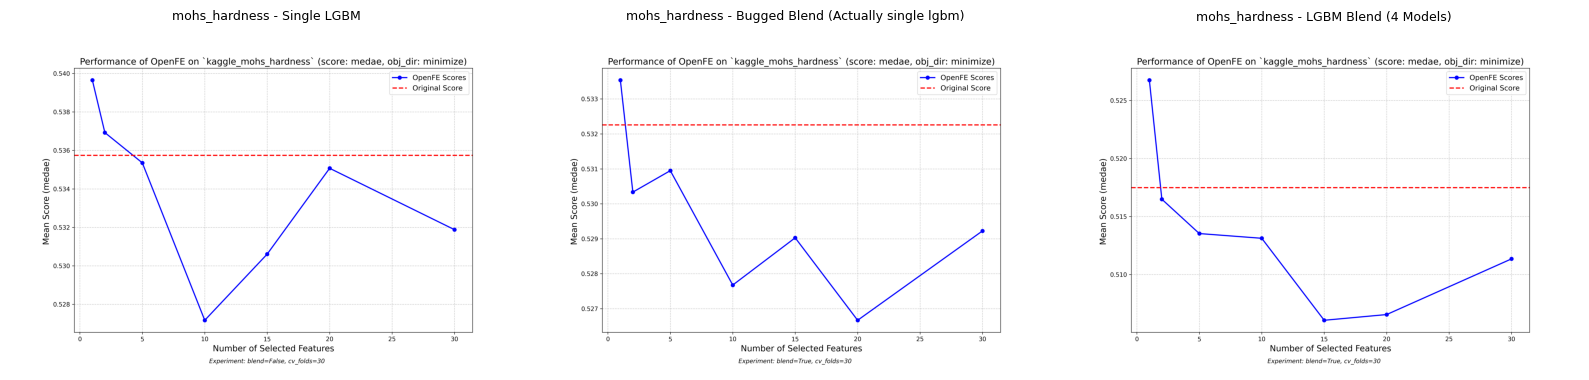

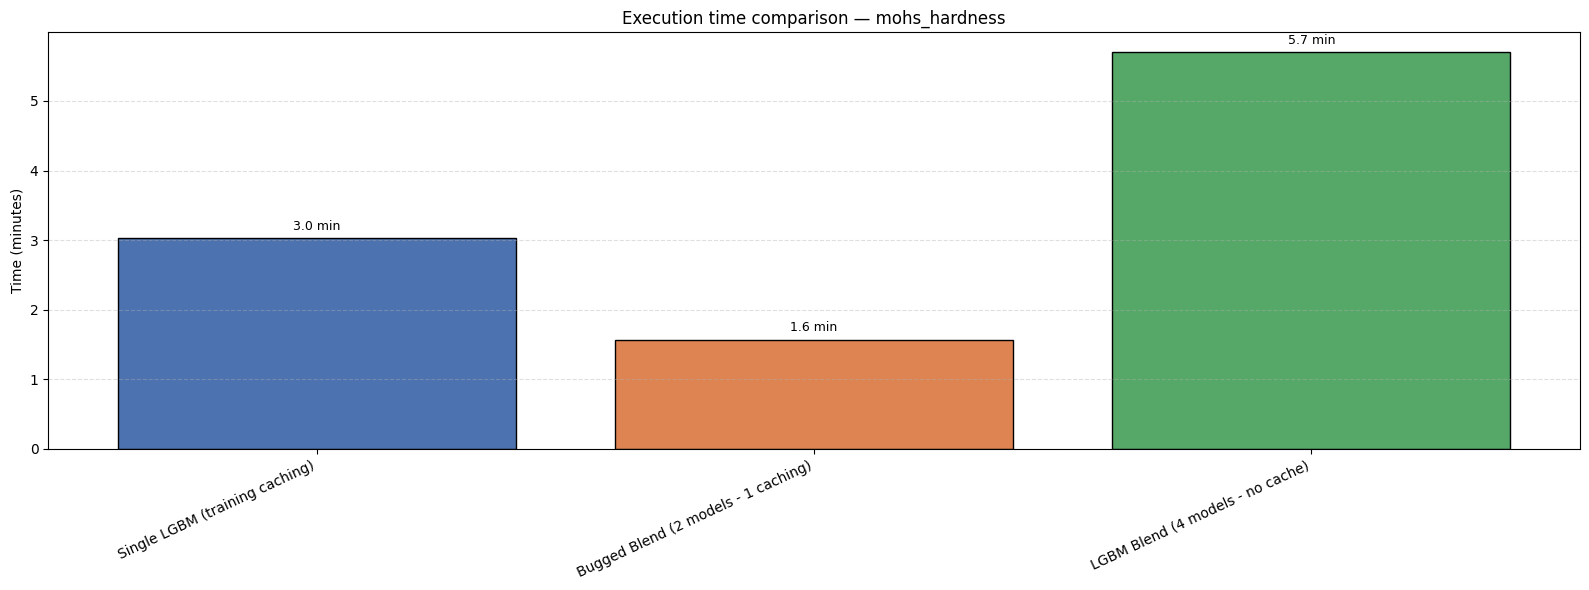



Comparing plots for dataset: crab_age

Objective Direction: minimize



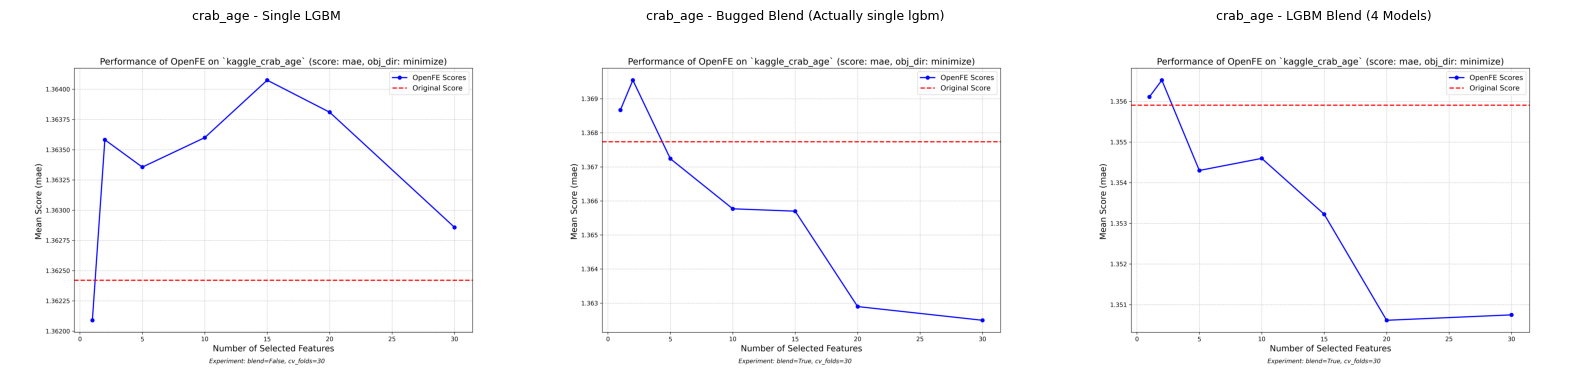

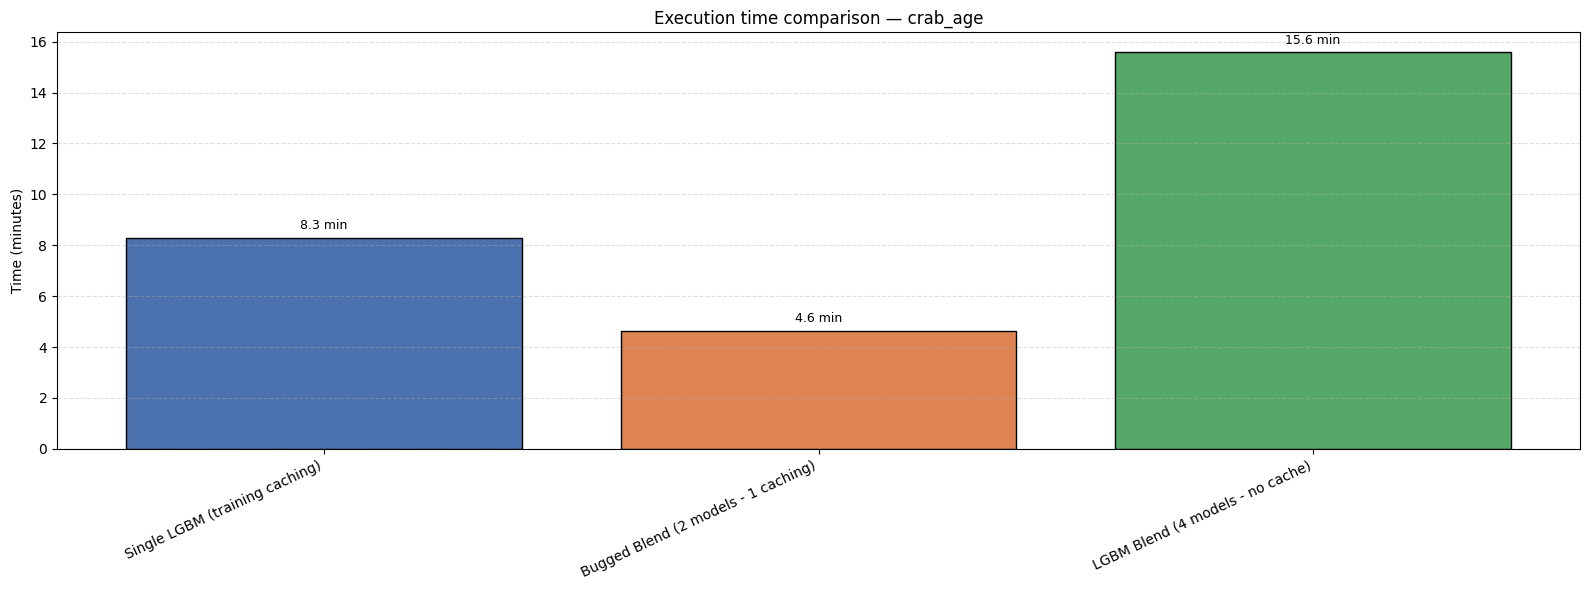



Comparing plots for dataset: housing_price_california

Objective Direction: minimize



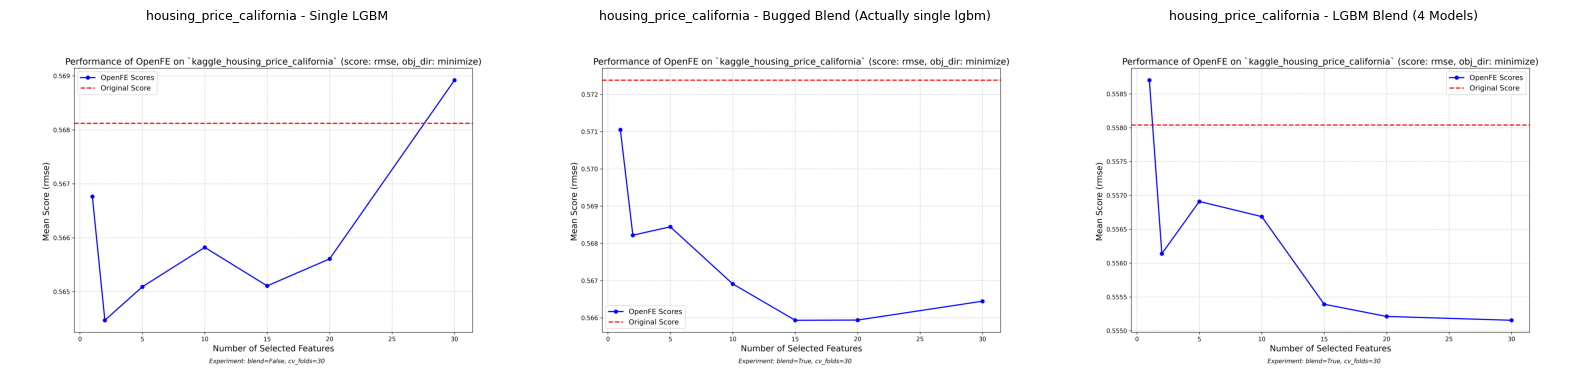

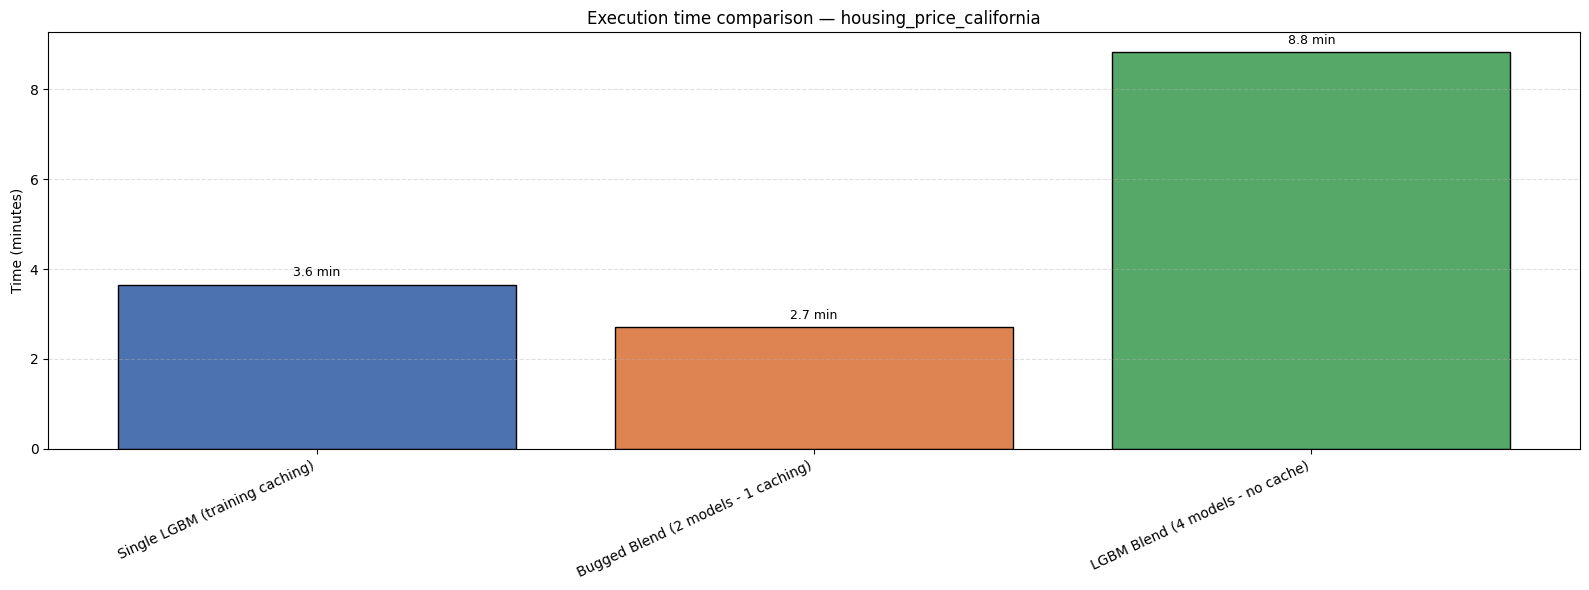



Comparing plots for dataset: influencer

Objective Direction: maximize



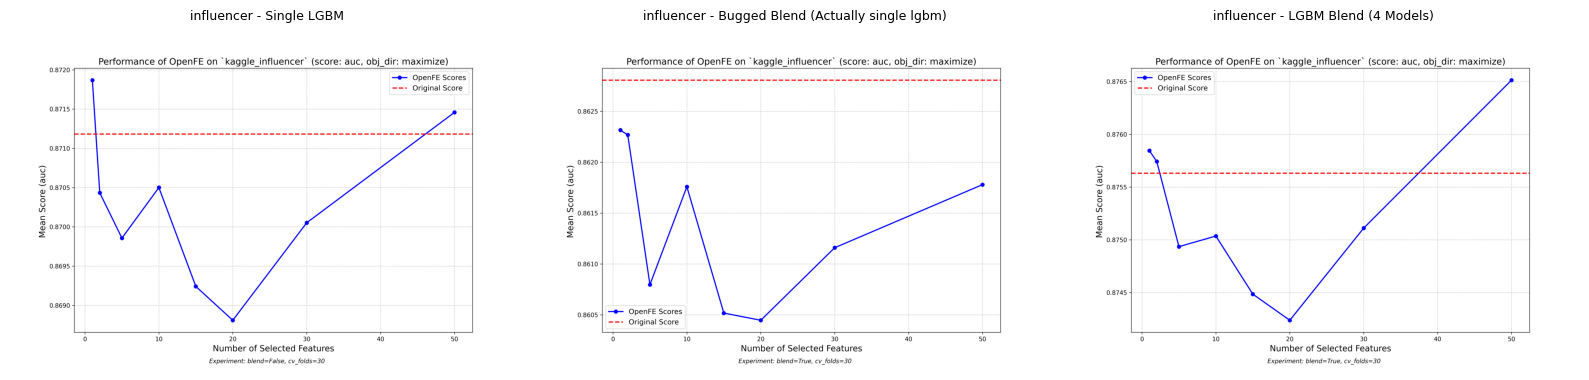

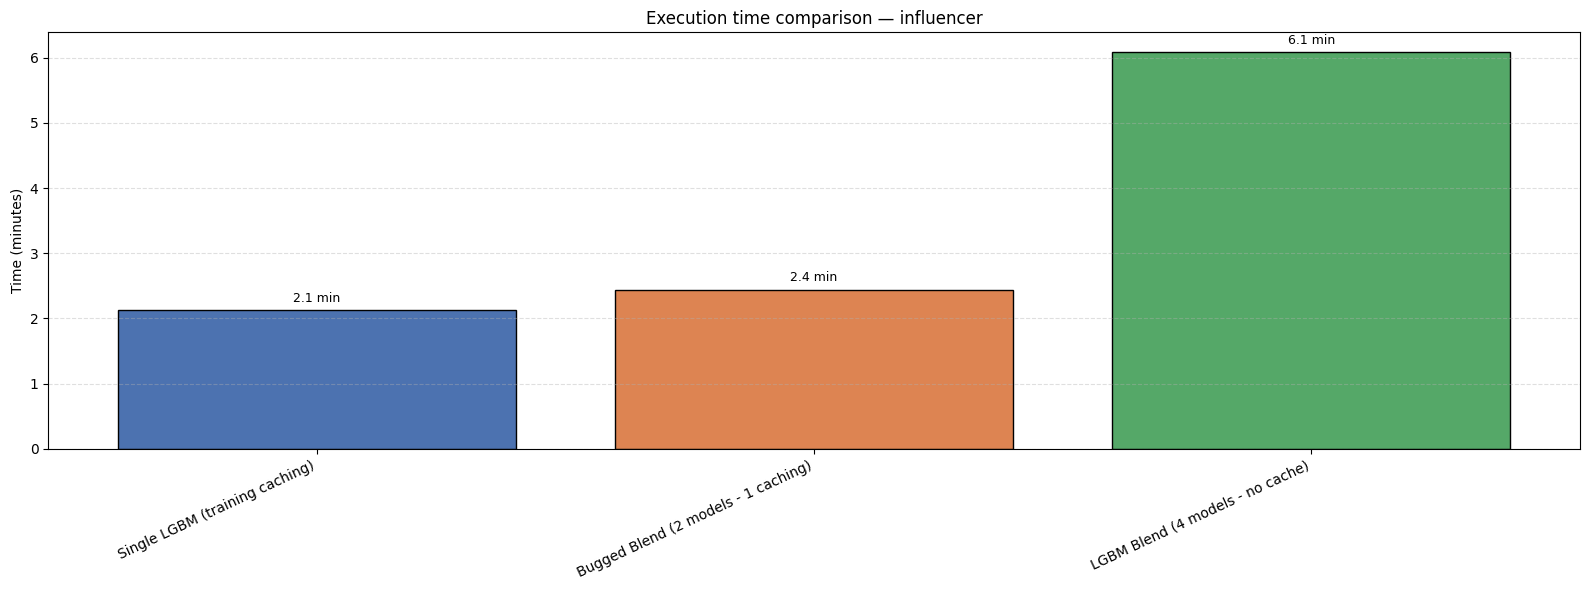



Comparing plots for dataset: cirrhosis_outcomes

Objective Direction: minimize



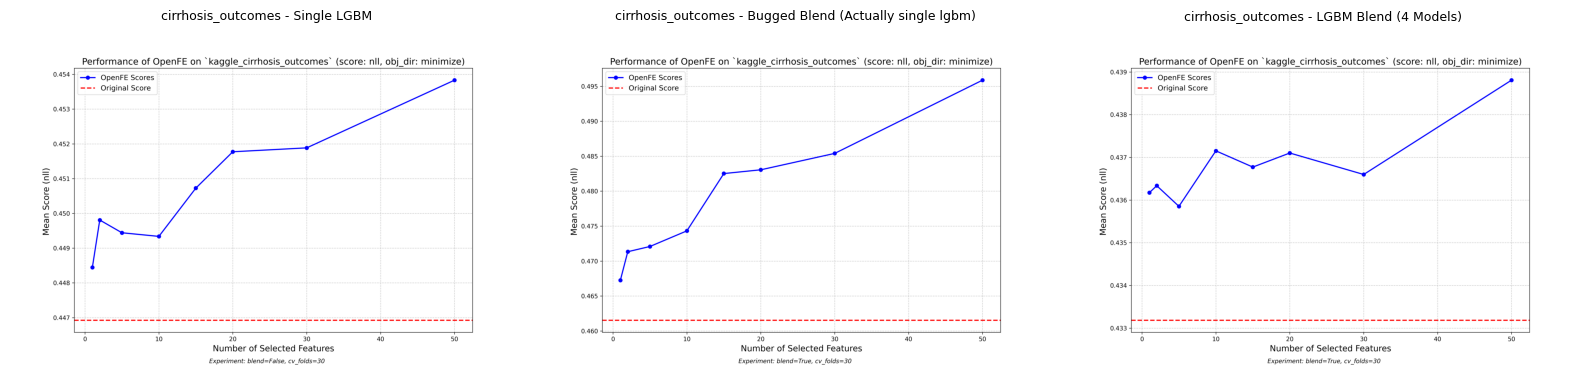

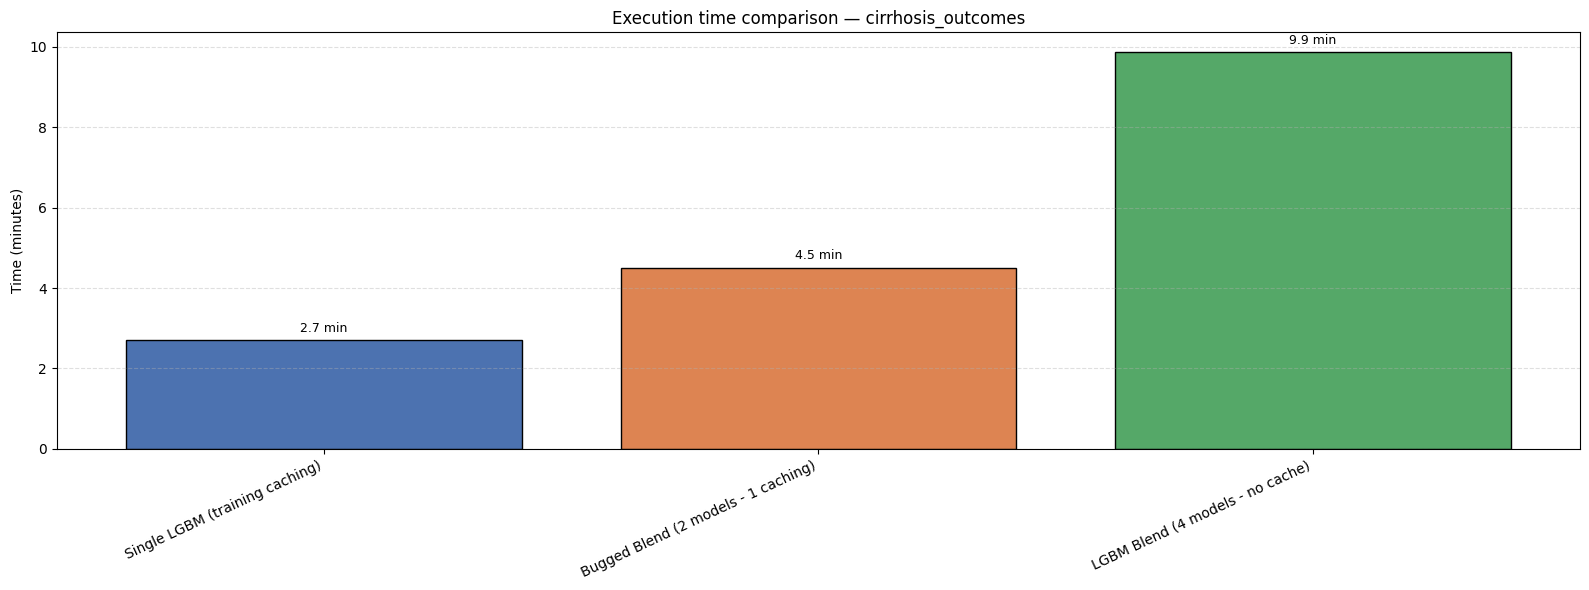



Comparing plots for dataset: sticker_sales
An error occurred while processing sticker_sales: [Errno 2] No such file or directory: 'openfe_experiments/openfe_kaggle_sticker_sales_10k_mcf_2_db_fb_False_grid_search/kaggle_sticker_sales/experiment_metadata.json'


Comparing plots for dataset: reservation_cancellation

Objective Direction: maximize



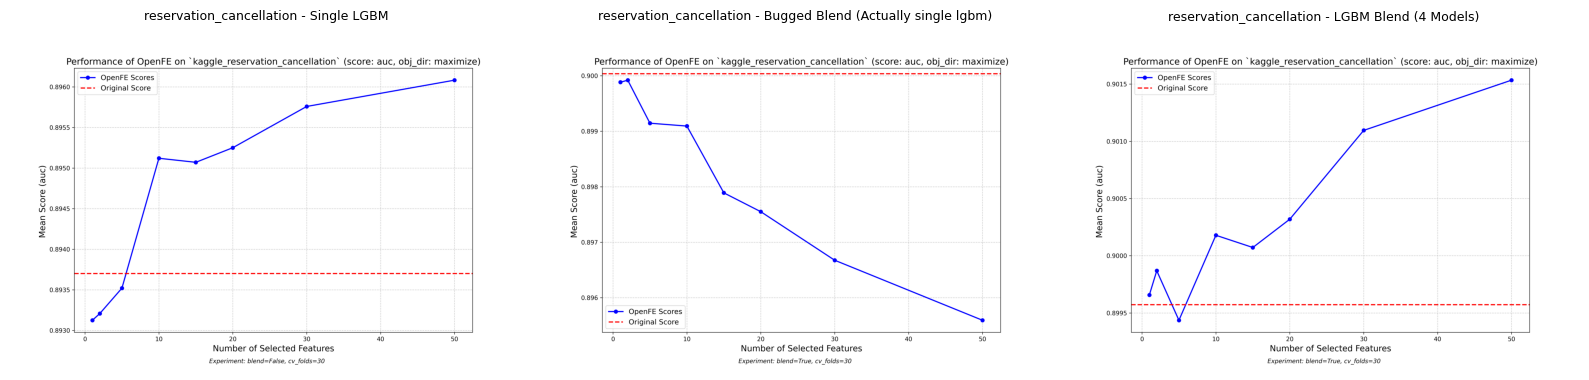

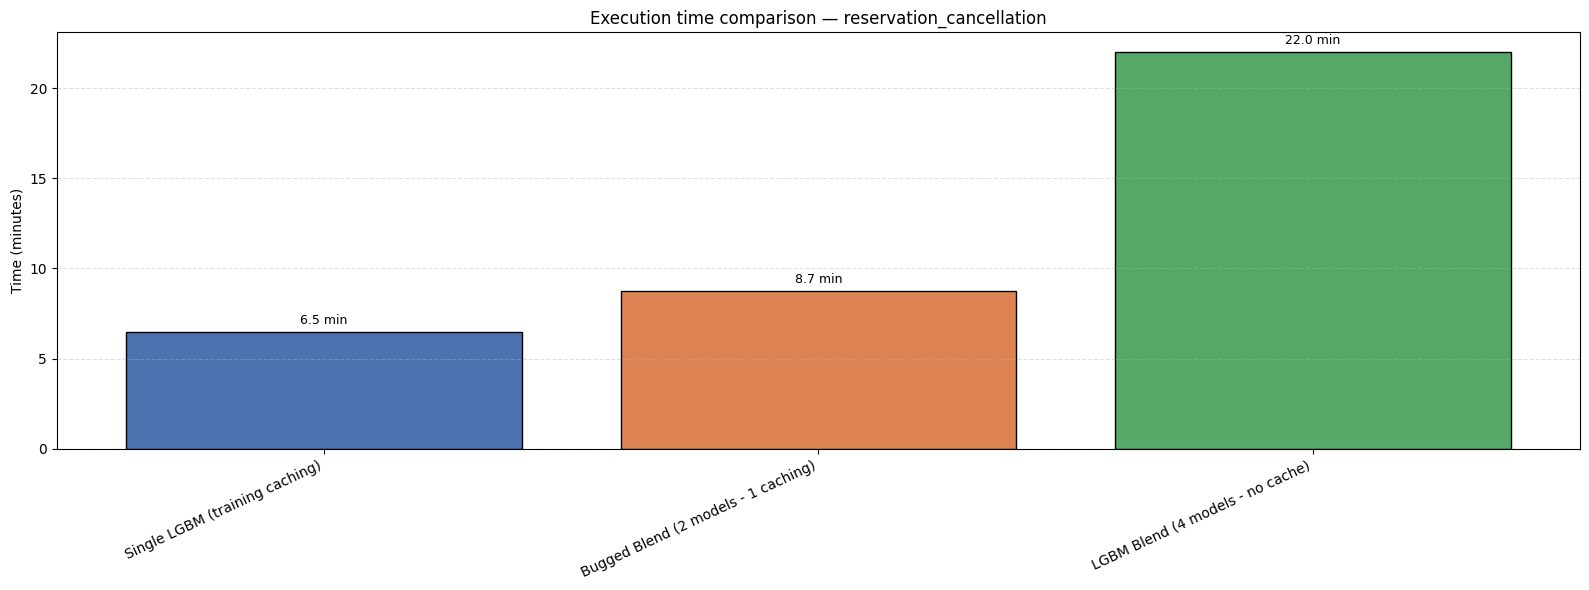



Comparing plots for dataset: obesity_risk

Objective Direction: maximize



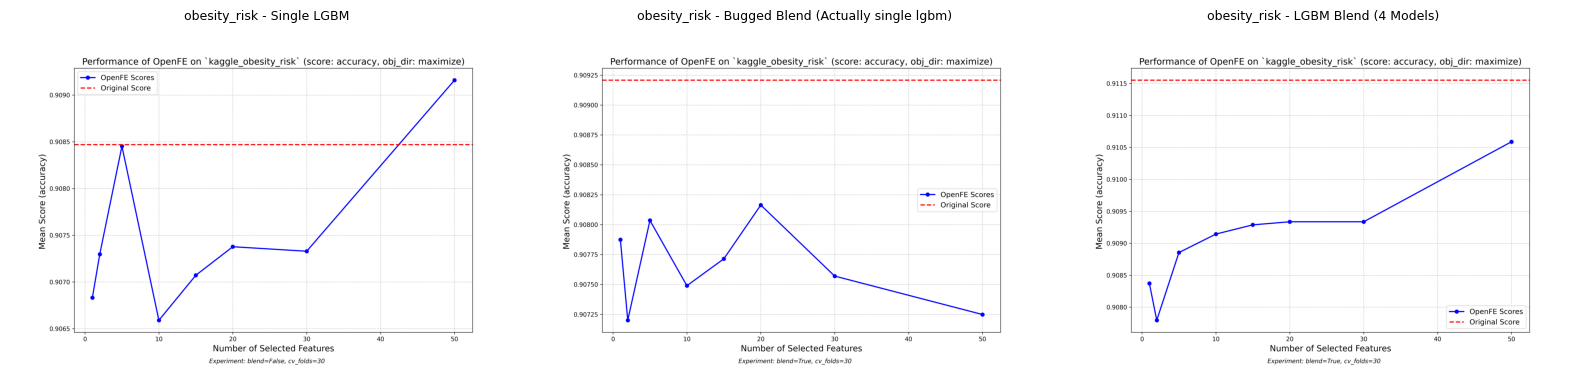

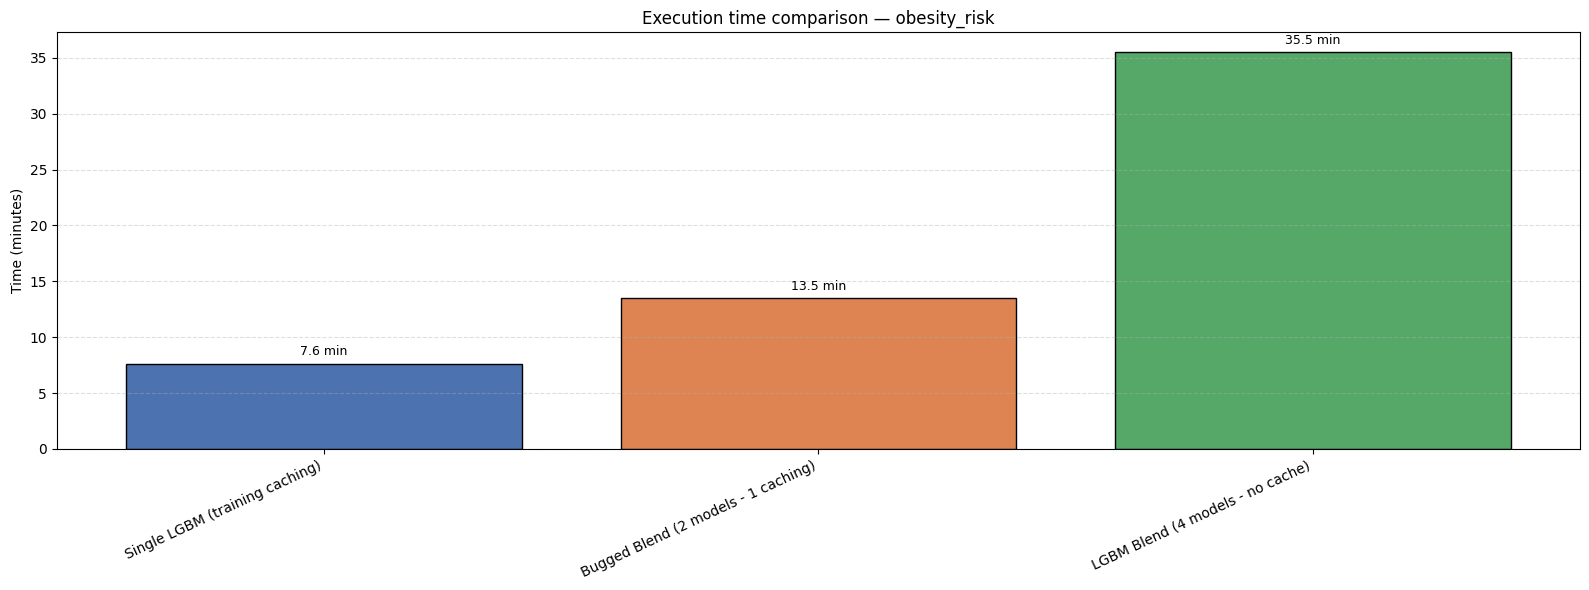



Comparing plots for dataset: loan_approval

Objective Direction: maximize



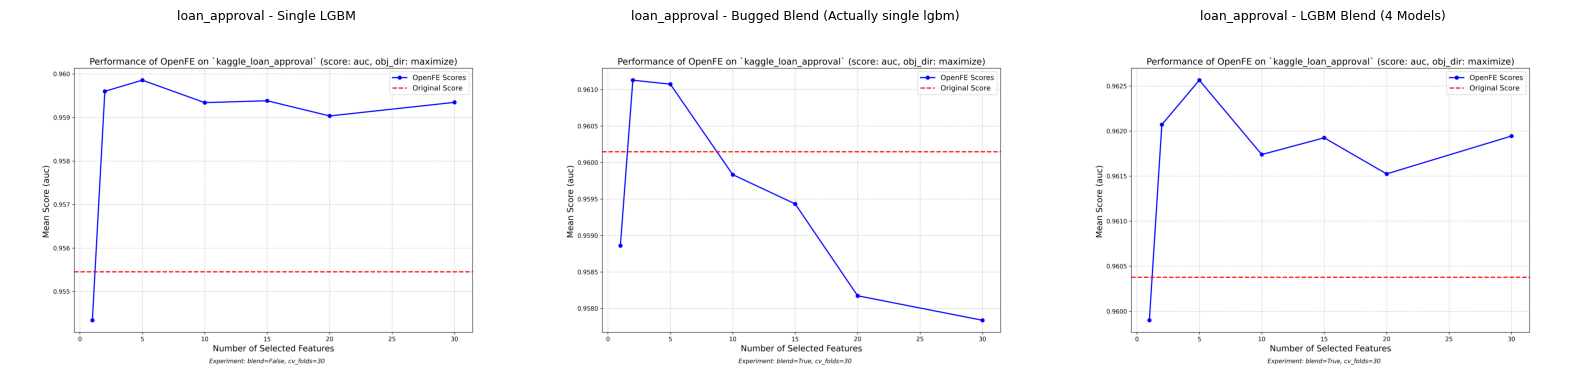

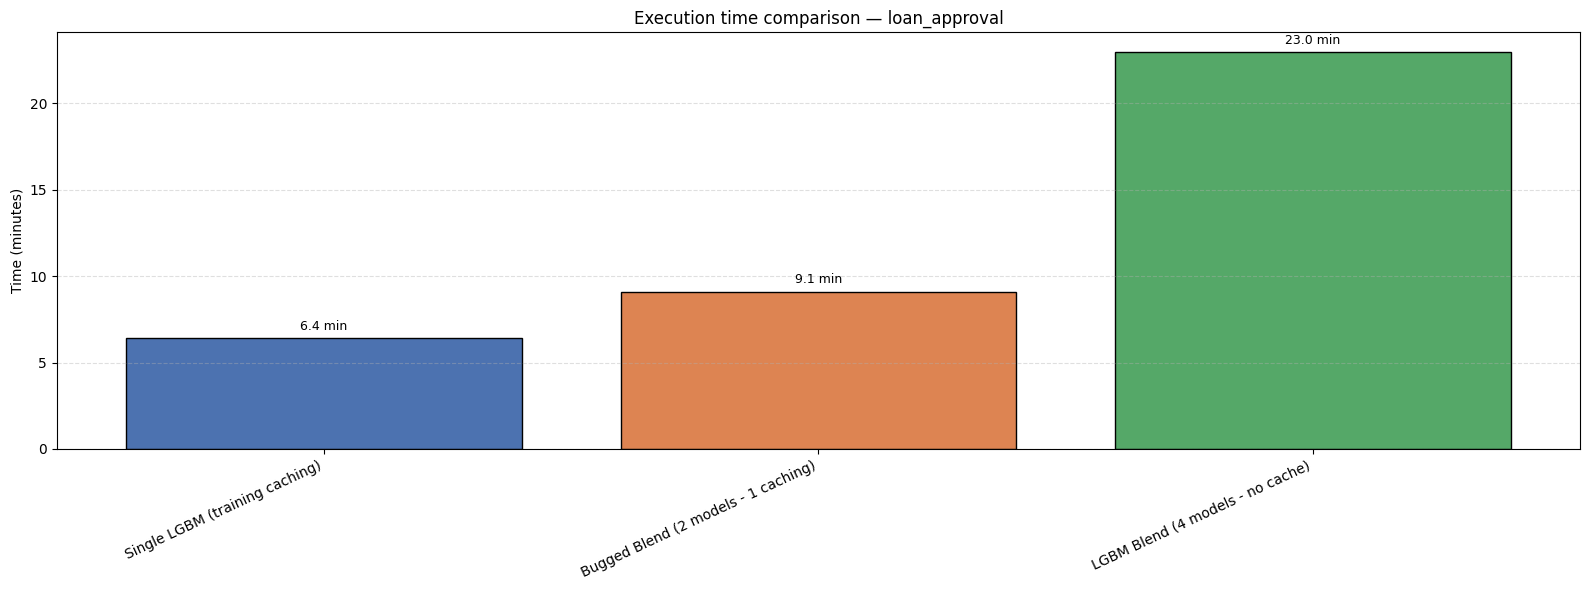



Comparing plots for dataset: calorie_expenditure

Objective Direction: minimize



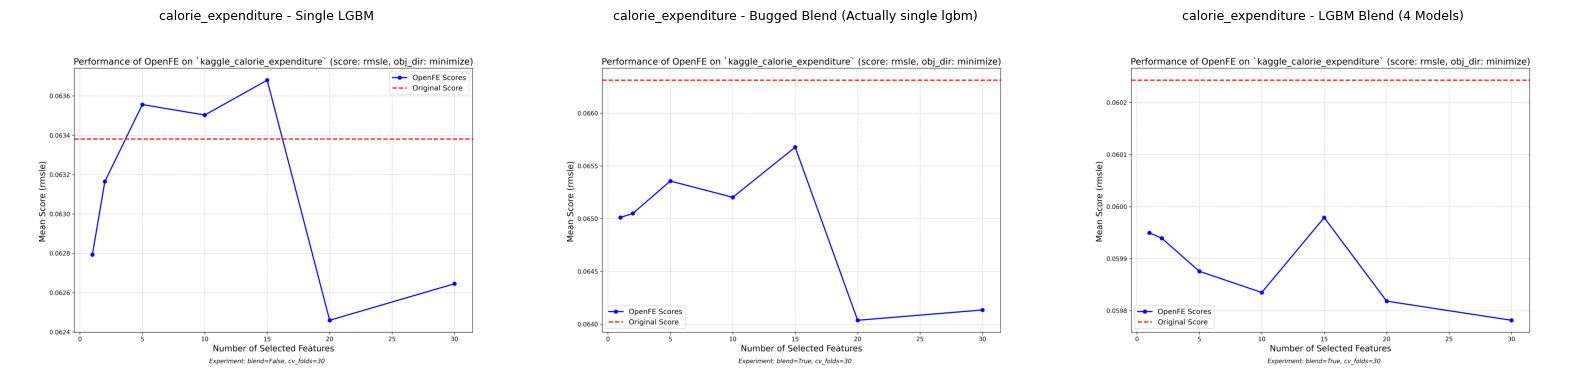

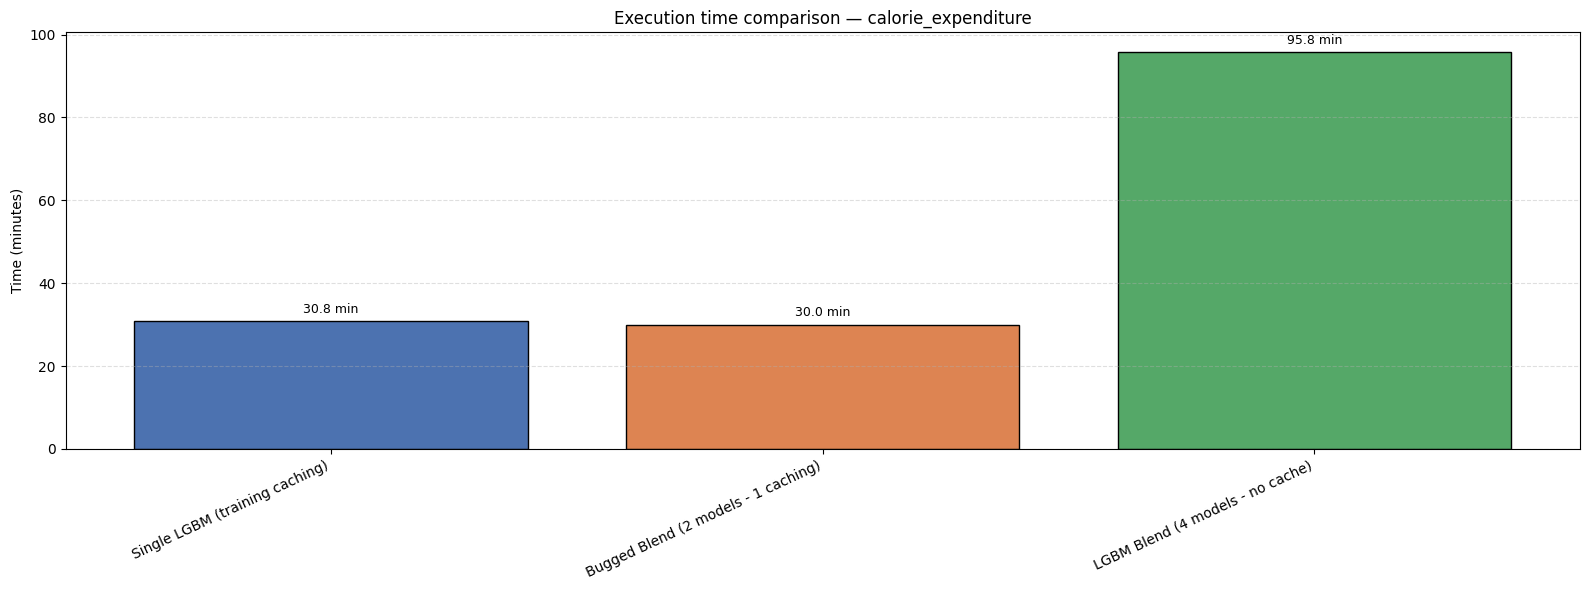



Comparing plots for dataset: credit_fusion

Objective Direction: maximize



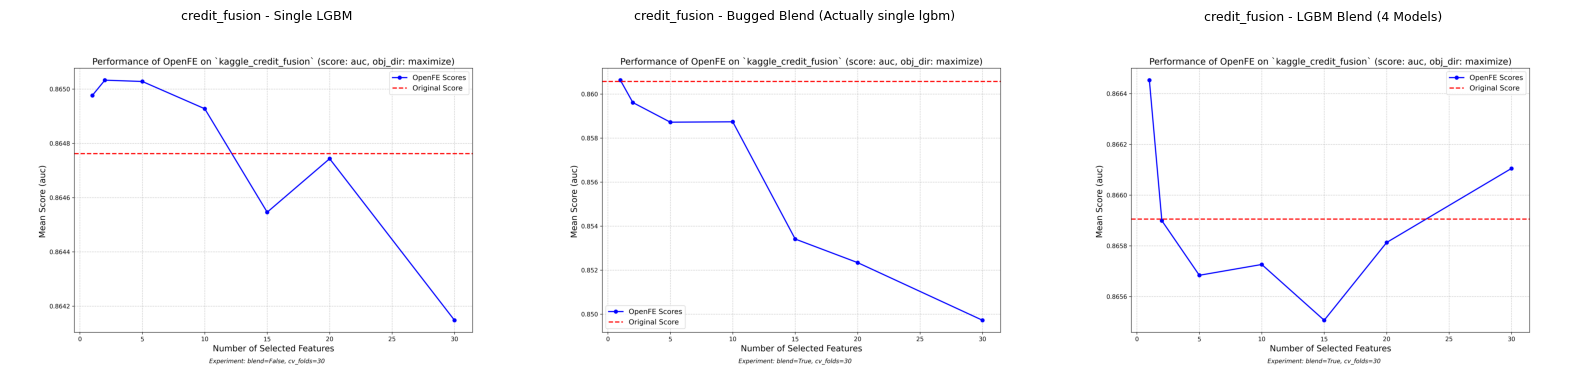

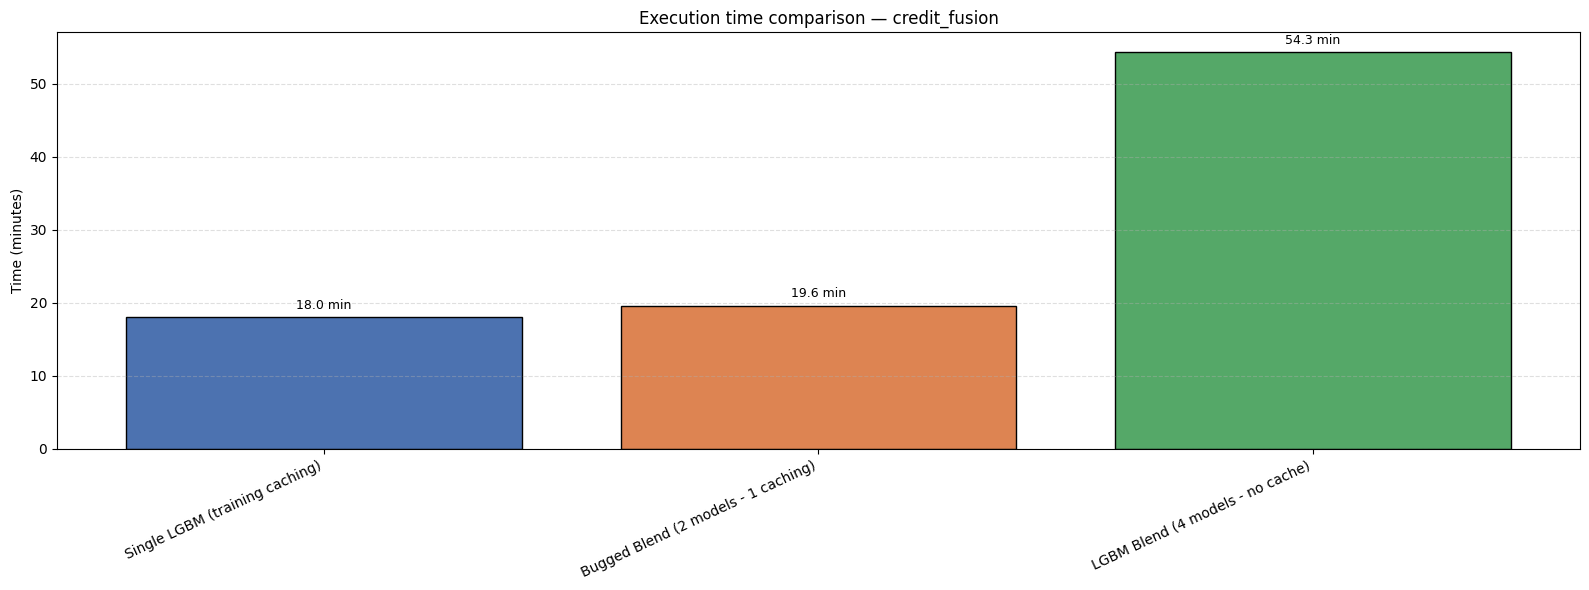



Comparing plots for dataset: bank_churn

Objective Direction: maximize



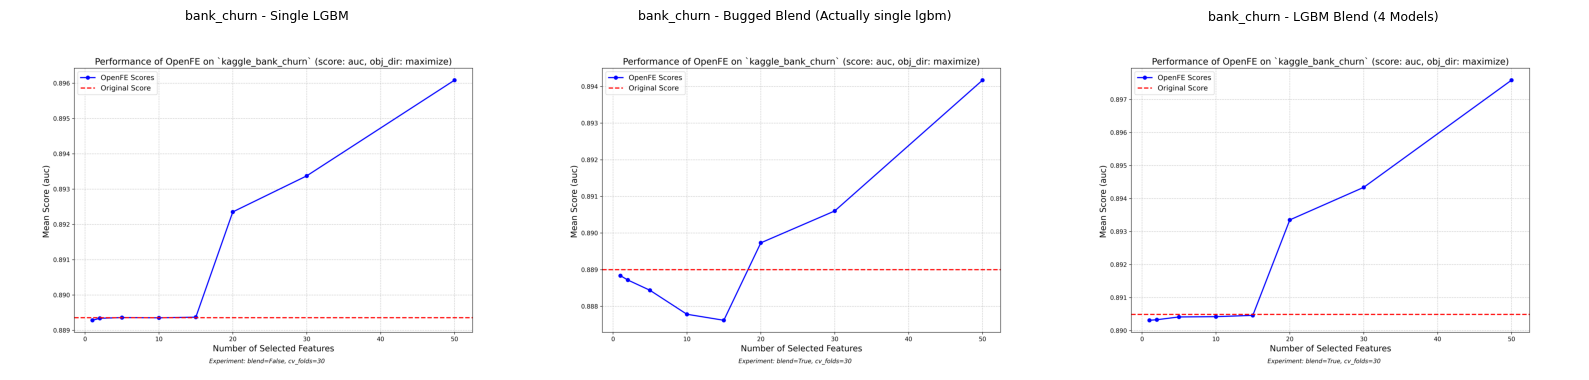

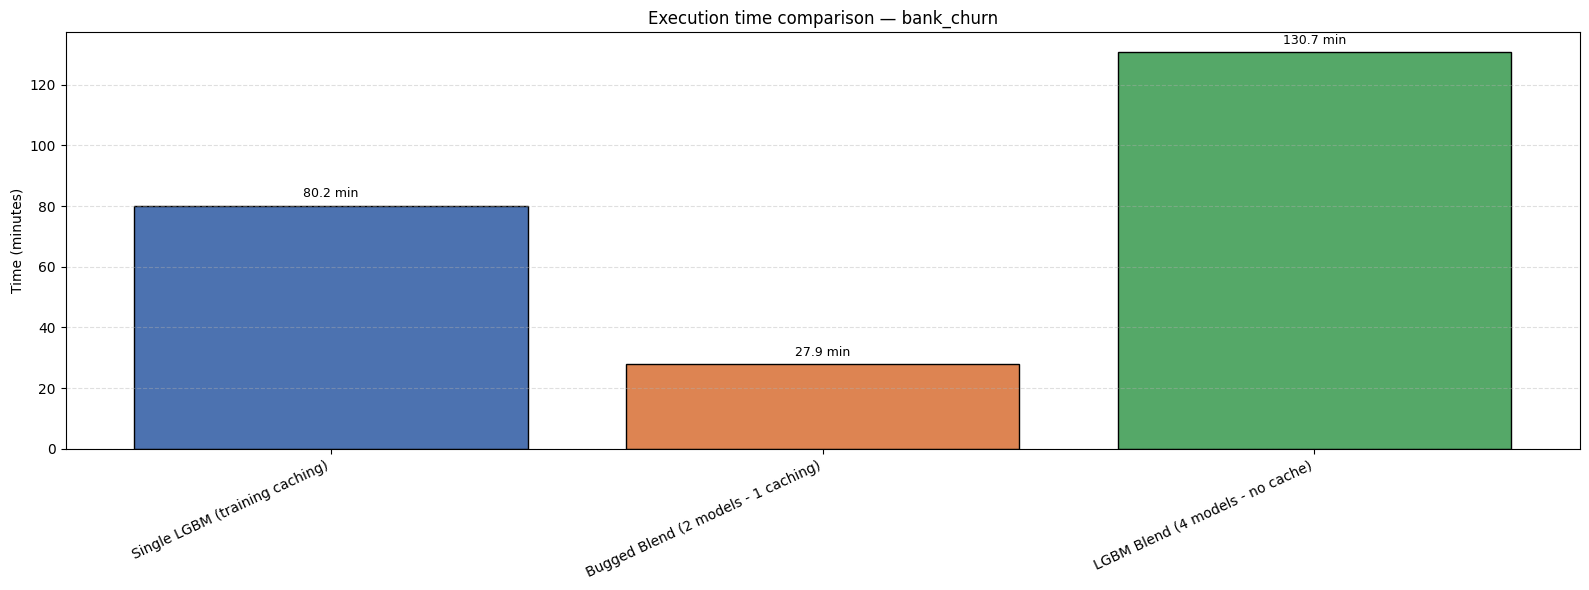



Comparing plots for dataset: failure

Objective Direction: maximize



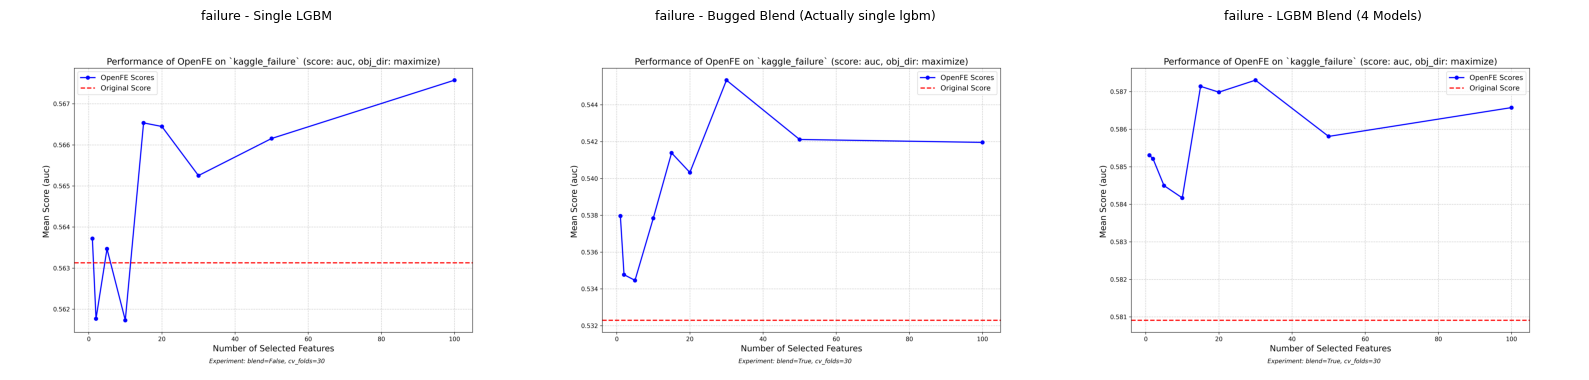

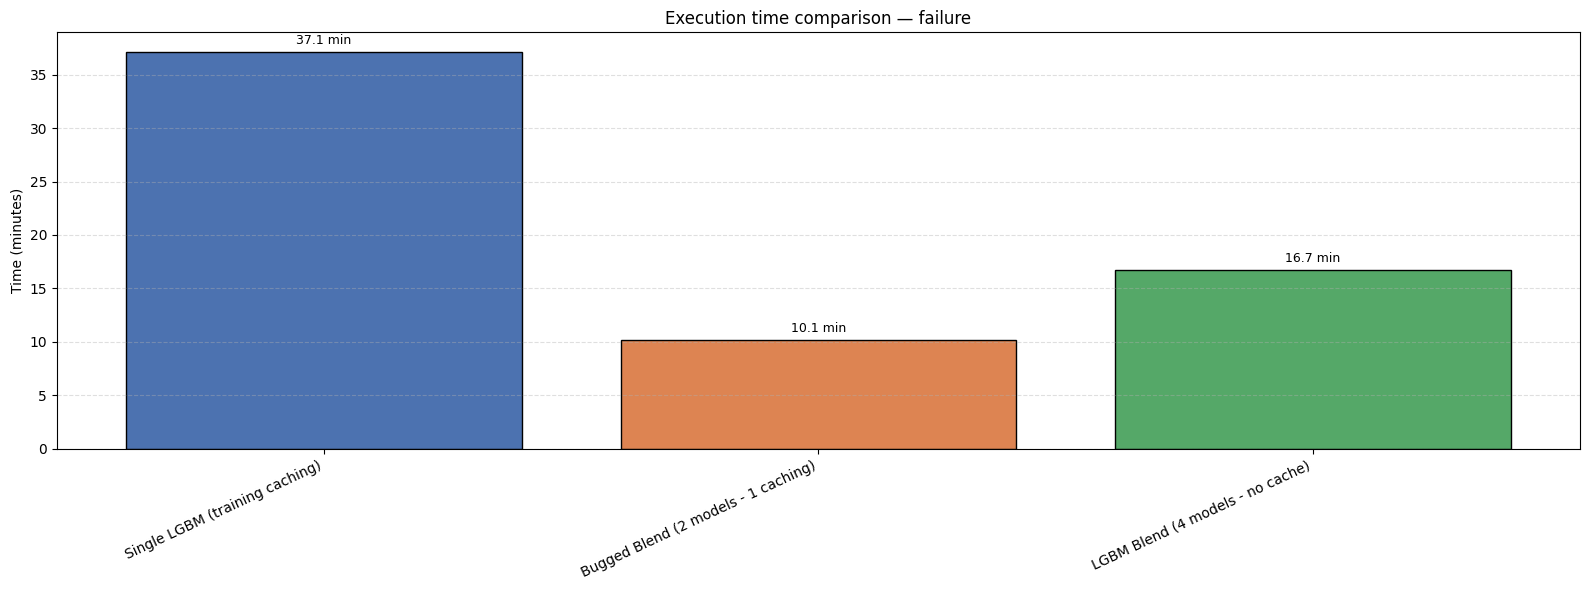



Comparing plots for dataset: unknown_a

Objective Direction: minimize



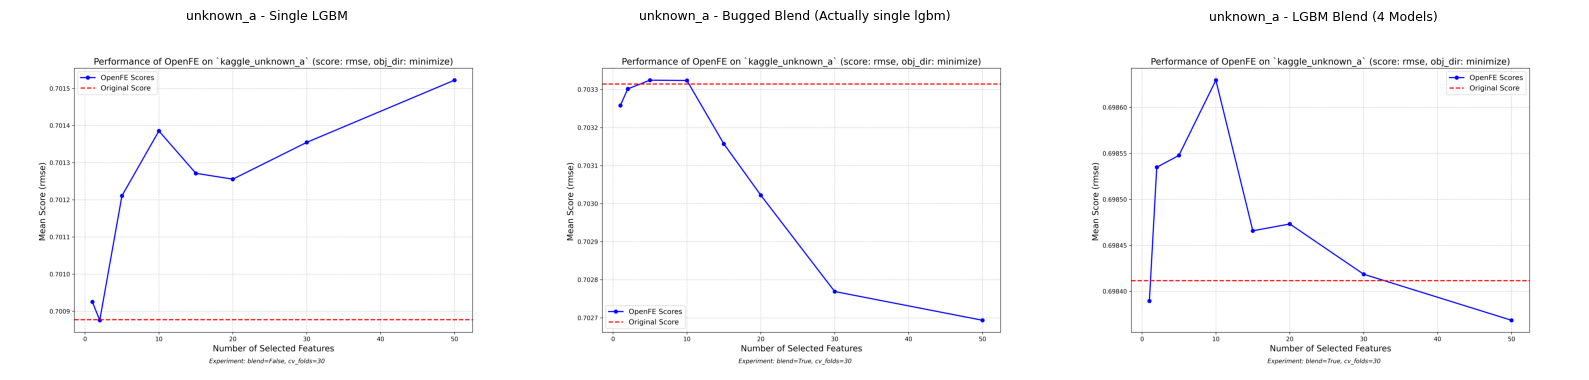

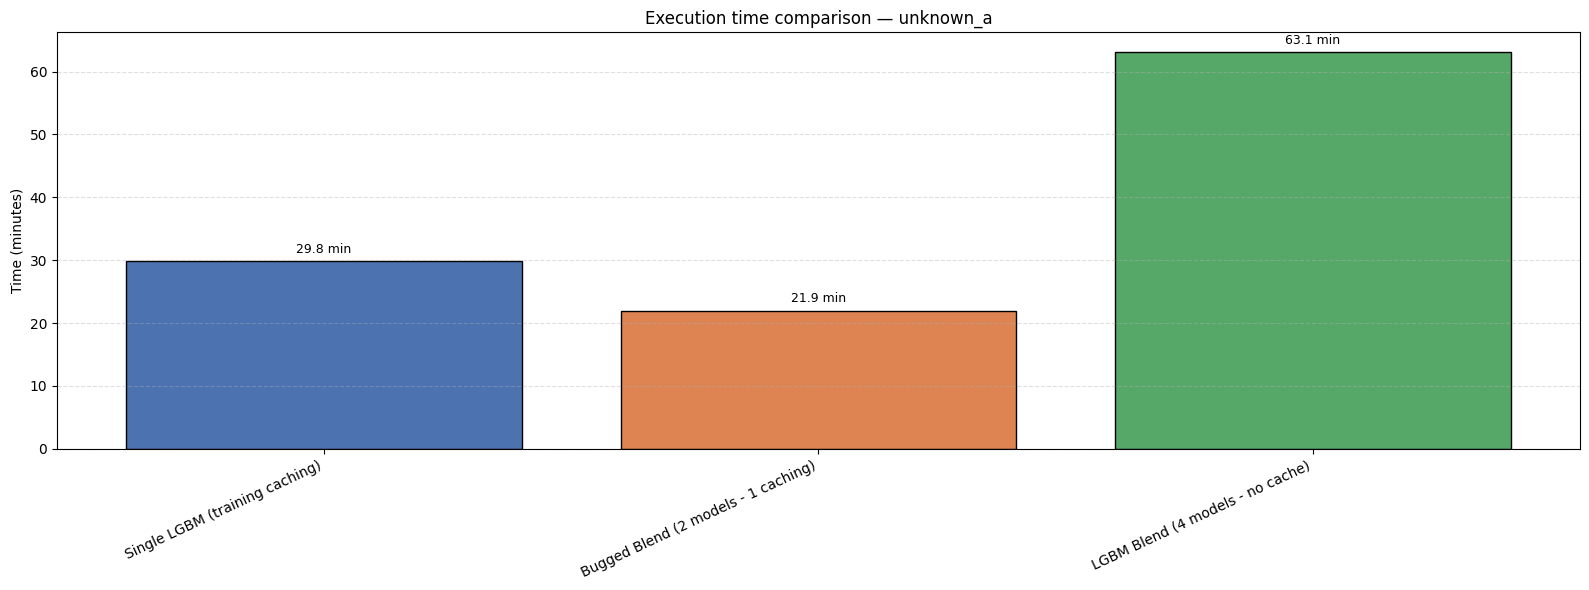



Comparing plots for dataset: horse_survival
An error occurred while processing horse_survival: [Errno 2] No such file or directory: 'openfe_experiments/openfe_kaggle_horse_survival_10k_mcf_2_db_fb_False_grid_search/kaggle_horse_survival/experiment_metadata.json'


Comparing plots for dataset: media_cost

Objective Direction: minimize



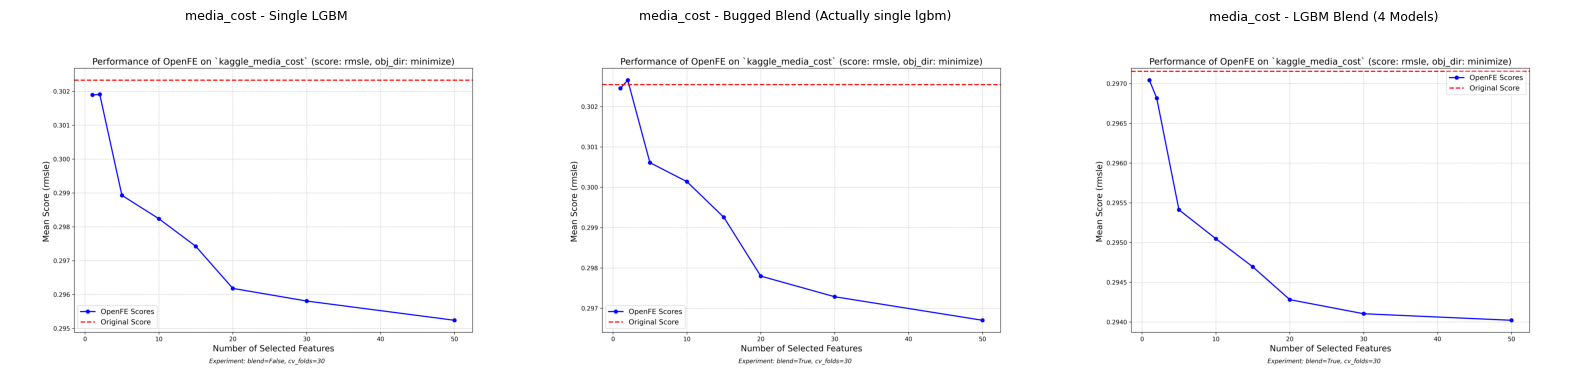

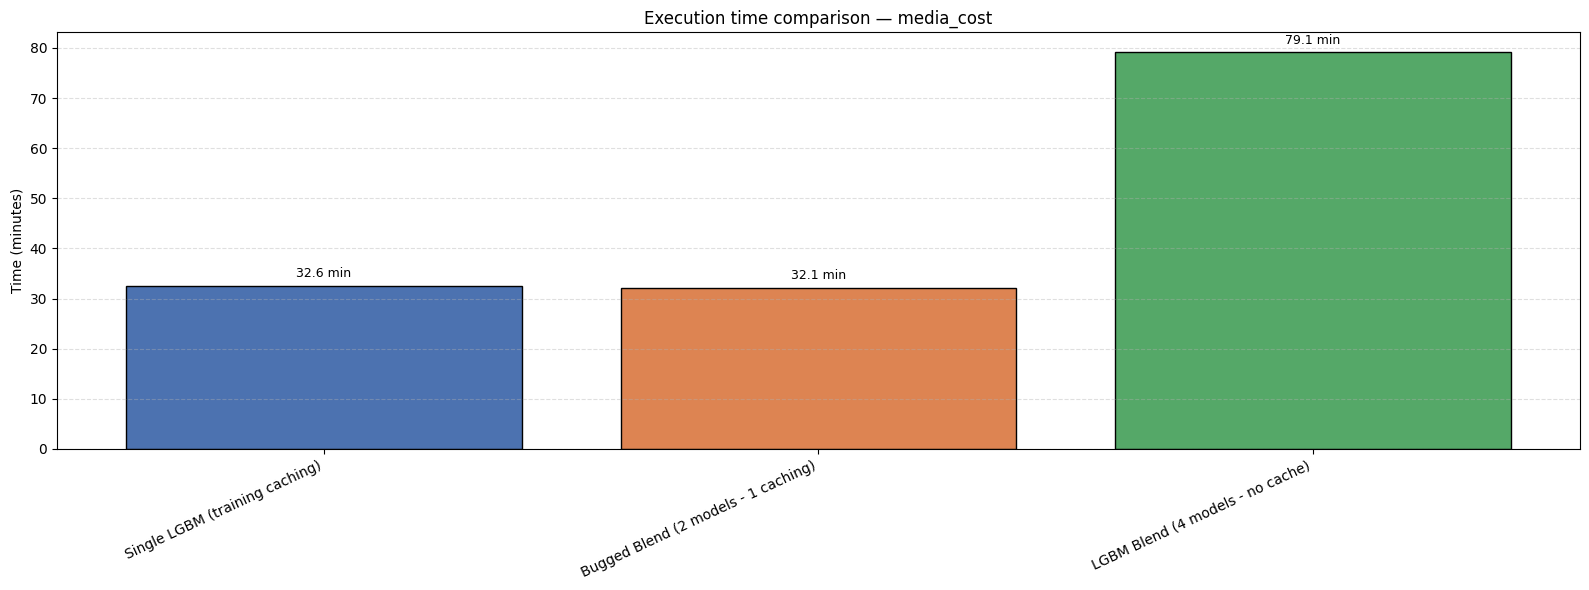



Comparing plots for dataset: smoking

Objective Direction: maximize



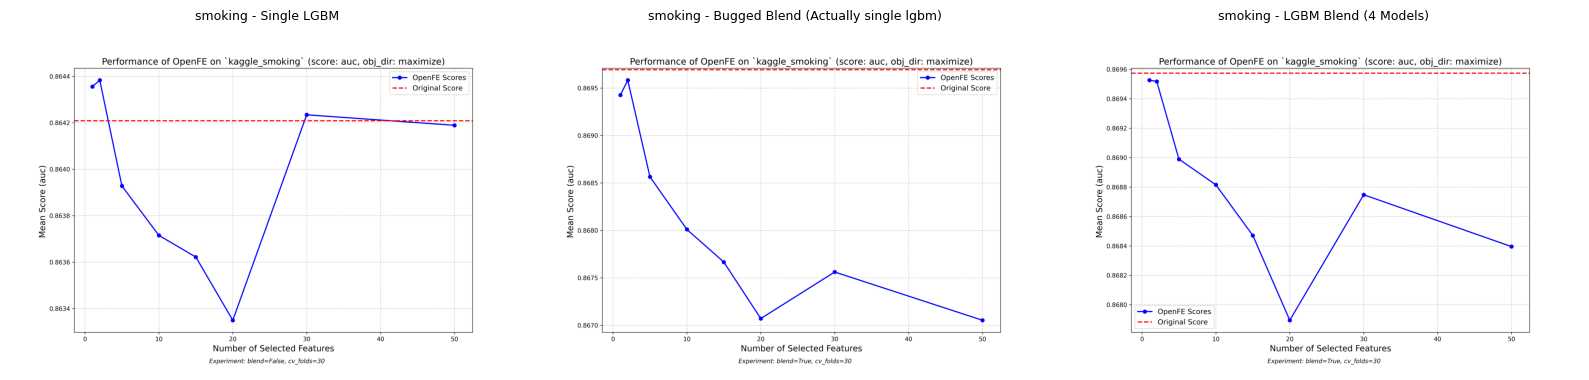

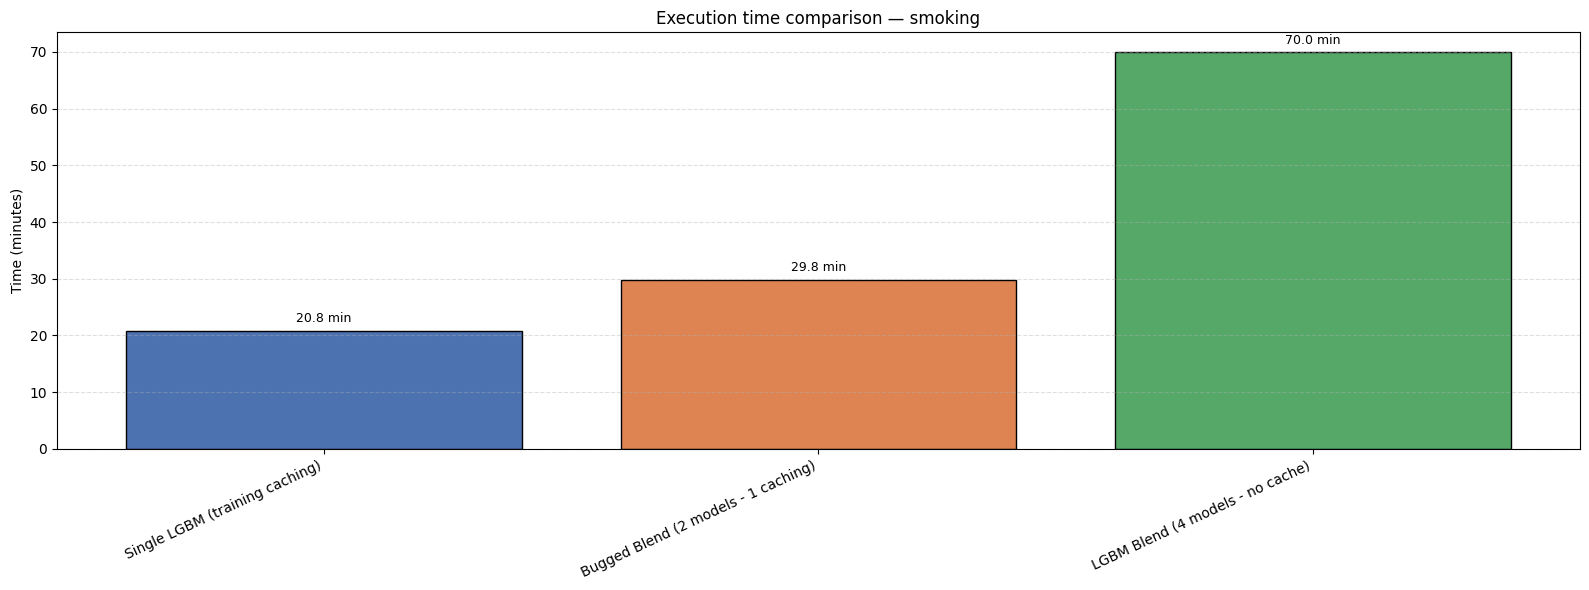



Comparing plots for dataset: mercedes_testing_time

Objective Direction: maximize



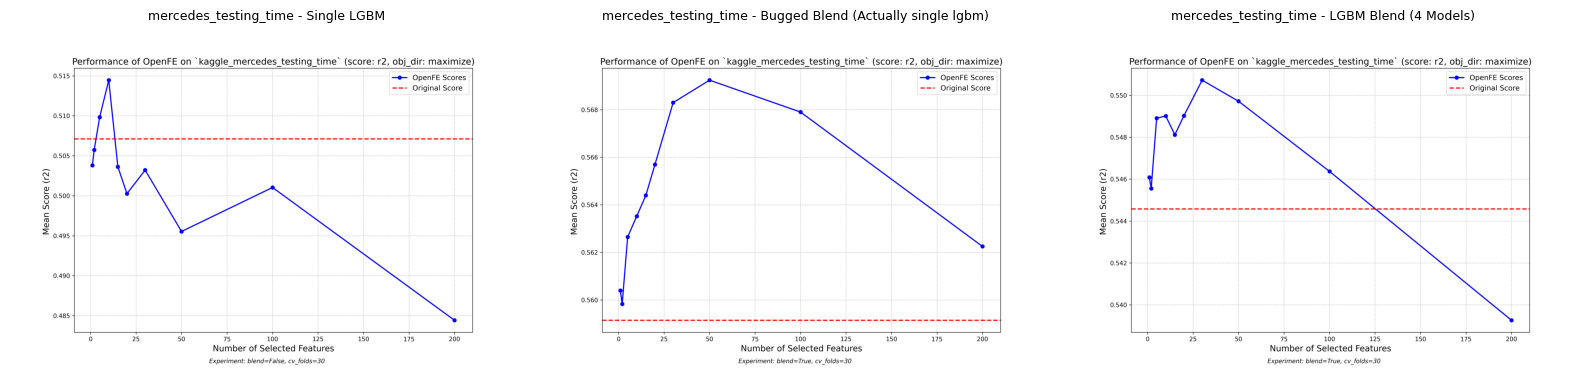

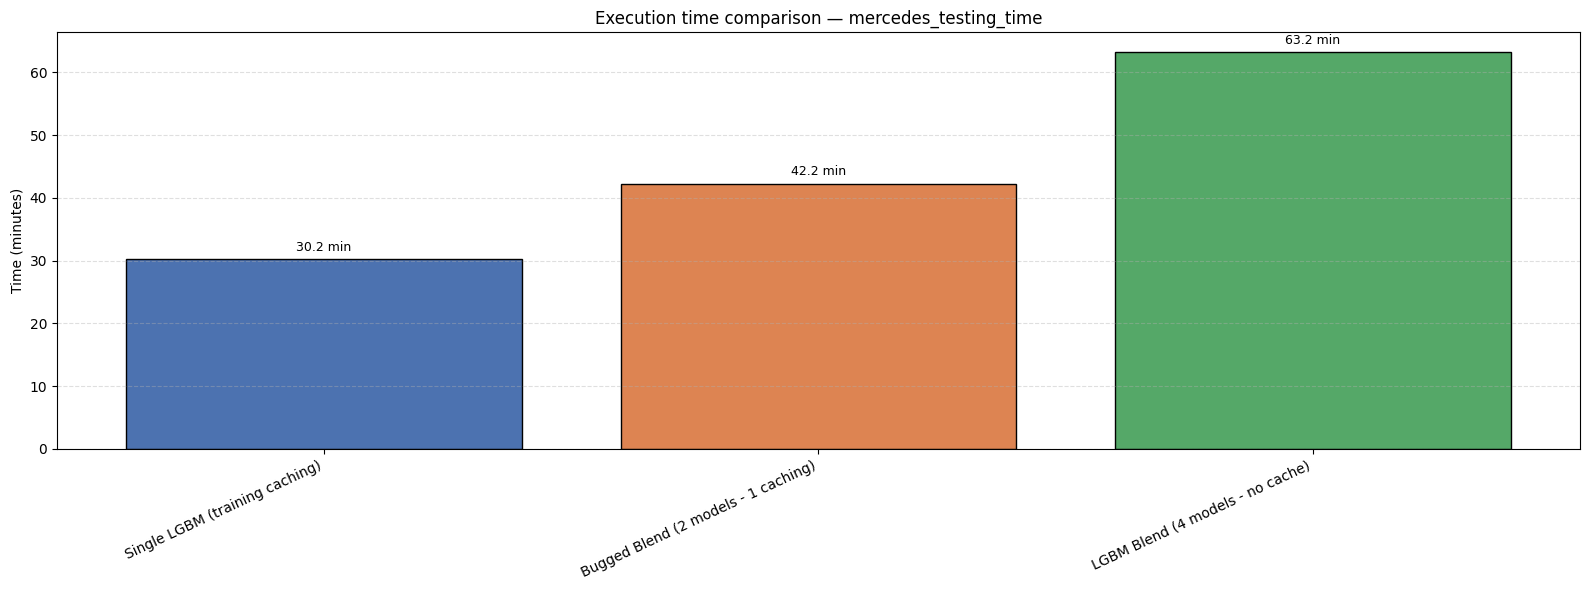



Comparing plots for dataset: insurance_claim

Objective Direction: minimize



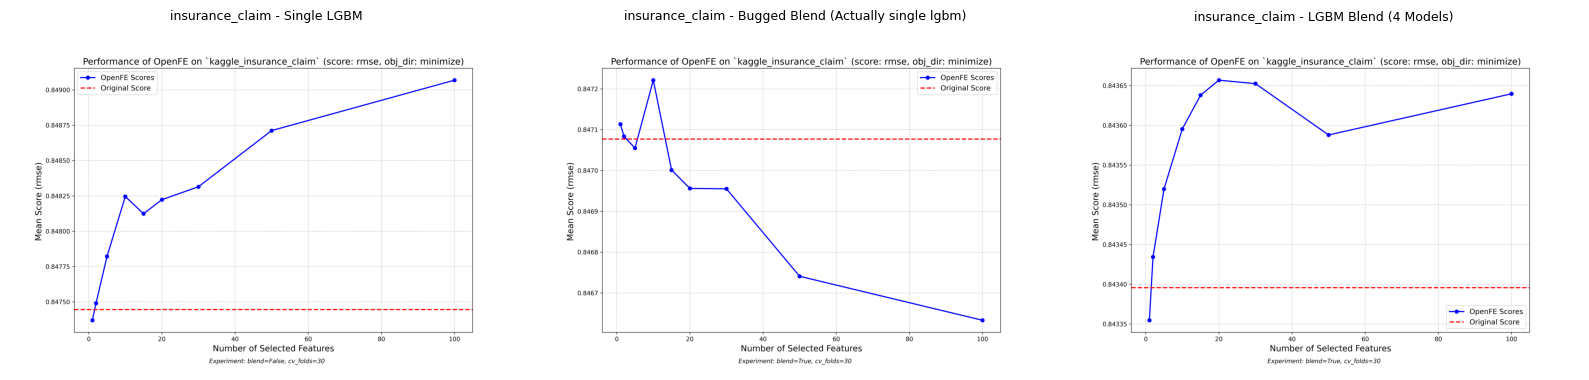

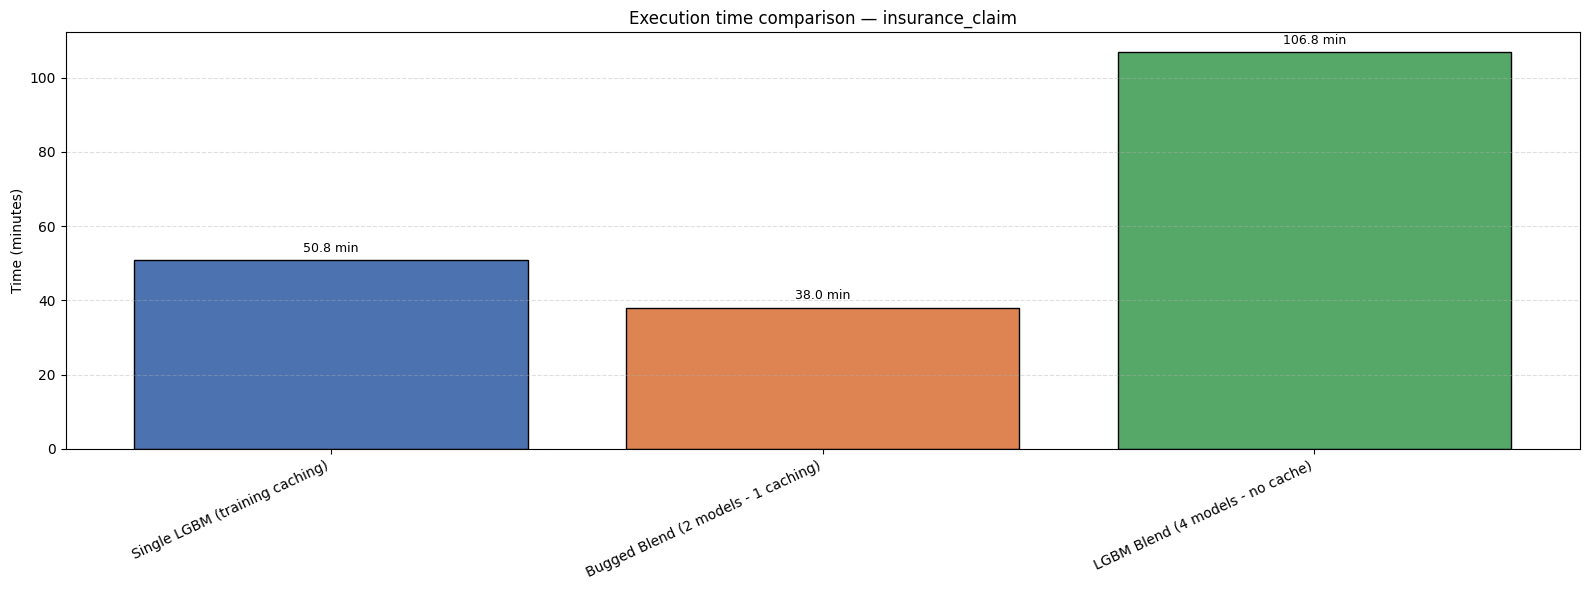



Comparing plots for dataset: synthanic
An error occurred while processing synthanic: [Errno 2] No such file or directory: 'openfe_experiments/openfe_kaggle_synthanic_10k_mcf_2_db_fb_False_grid_search/kaggle_synthanic/experiment_metadata.json'


Comparing plots for dataset: mental_health
An error occurred while processing mental_health: [Errno 2] No such file or directory: 'openfe_experiments/openfe_kaggle_mental_health_10k_mcf_2_db_fb_False_grid_search/kaggle_mental_health/experiment_metadata.json'


Comparing plots for dataset: flood_probability
An error occurred while processing flood_probability: [Errno 2] No such file or directory: 'openfe_experiments/openfe_kaggle_flood_probability_10k_mcf_2_db_fb_False_grid_search_blend_4_models/kaggle_flood_probability/experiment_metadata.json'


Comparing plots for dataset: insurance_premium
An error occurred while processing insurance_premium: [Errno 2] No such file or directory: 'openfe_experiments/openfe_kaggle_insurance_premium_10k_mcf_2_

In [43]:
for data_name in datasets:
    try:
        print(f"\n\nComparing plots for dataset: {data_name}")
        single_lgbm_plot, bugged_blend, lgbm_blend = get_both_plots(data_name)
        single_metadata, bugged_metadata, blend_metadata = get_both_metadata(data_name)
        obj_direction = single_metadata["objective_direction"]
        print(f"\nObjective Direction: {obj_direction}\n")
        compare_plots(data_name, single_lgbm_plot, bugged_blend, lgbm_blend)
        compare_execution_times(data_name, single_metadata, bugged_metadata, blend_metadata)
    except Exception as e:
        print(f"An error occurred while processing {data_name}: {e}")